In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

# Estimating the Coefficients and Intercepts of Logistic Regression

In [2]:
X_log = np.linspace(0.01,0.99,99)
print(X_log[:5], '...', X_log[-5:])

[0.01 0.02 0.03 0.04 0.05] ... [0.95 0.96 0.97 0.98 0.99]


In [3]:
y_log = np.log(X_log)

Text(0.5, 1.0, 'Natural logarithm')

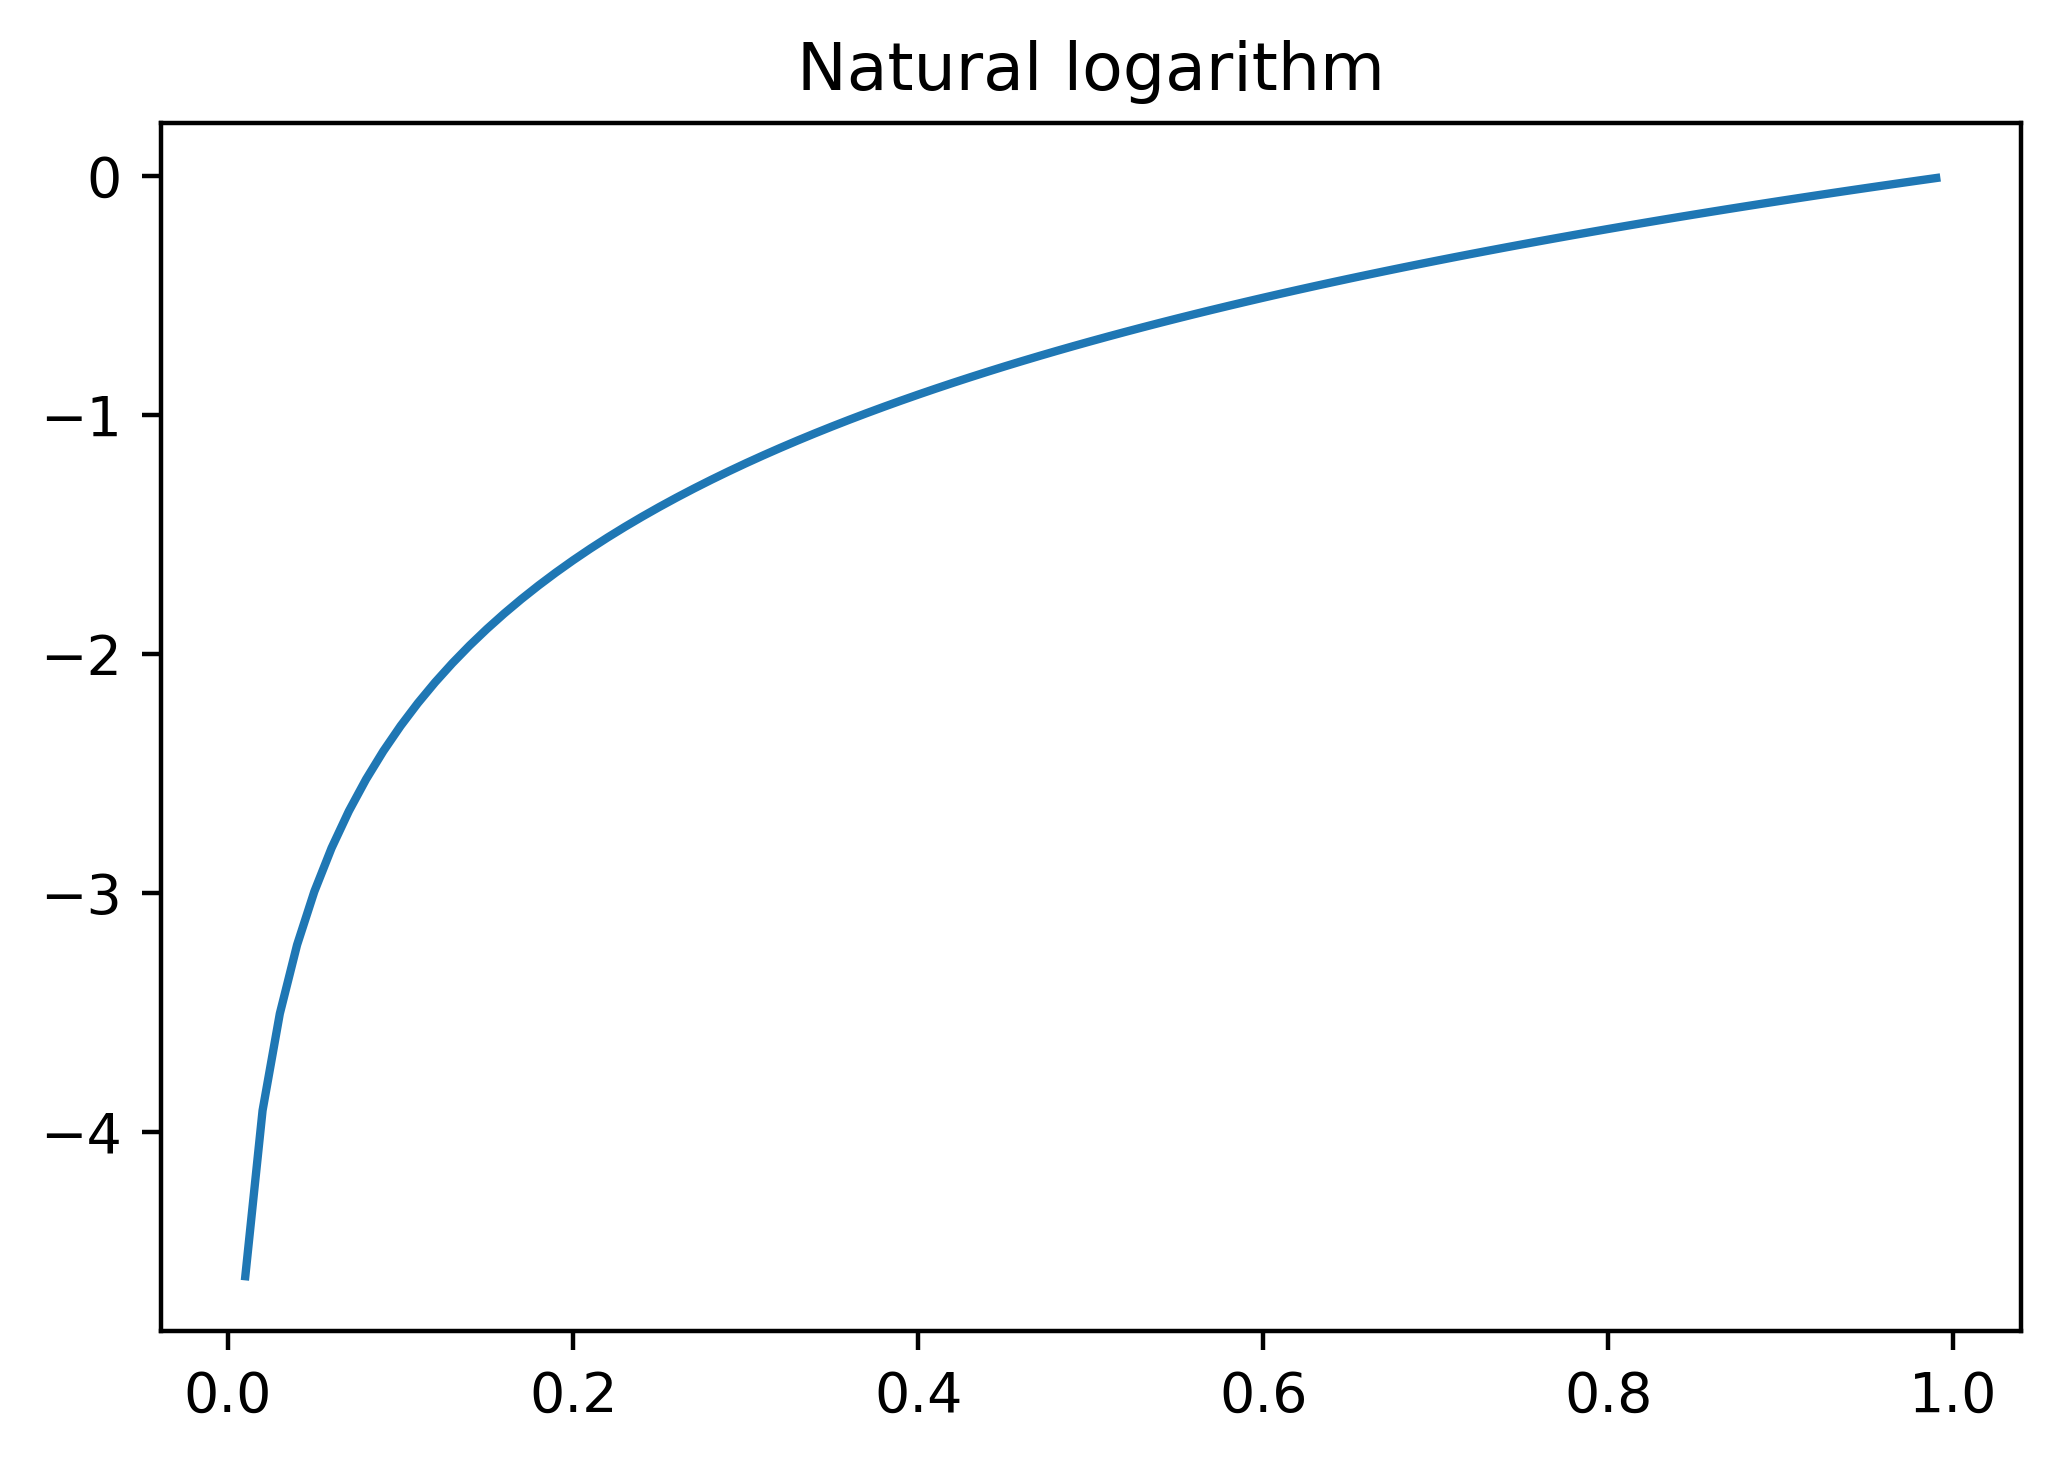

In [4]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.plot(X_log, y_log)
plt.title('Natural logarithm')

# Gradient Descent to Find Optimal Parameter Values

# Exercise 16: Using Gradient Descent to Minimize a Cost Function

In [5]:
X_poly = np.linspace(-3,5,81)
print(X_poly[:5], '...', X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


In [6]:
def cost_function(X):
    return X * (X-2)

In [7]:
y_poly = cost_function(X_poly)

Text(0.5, 1.0, 'Error surface')

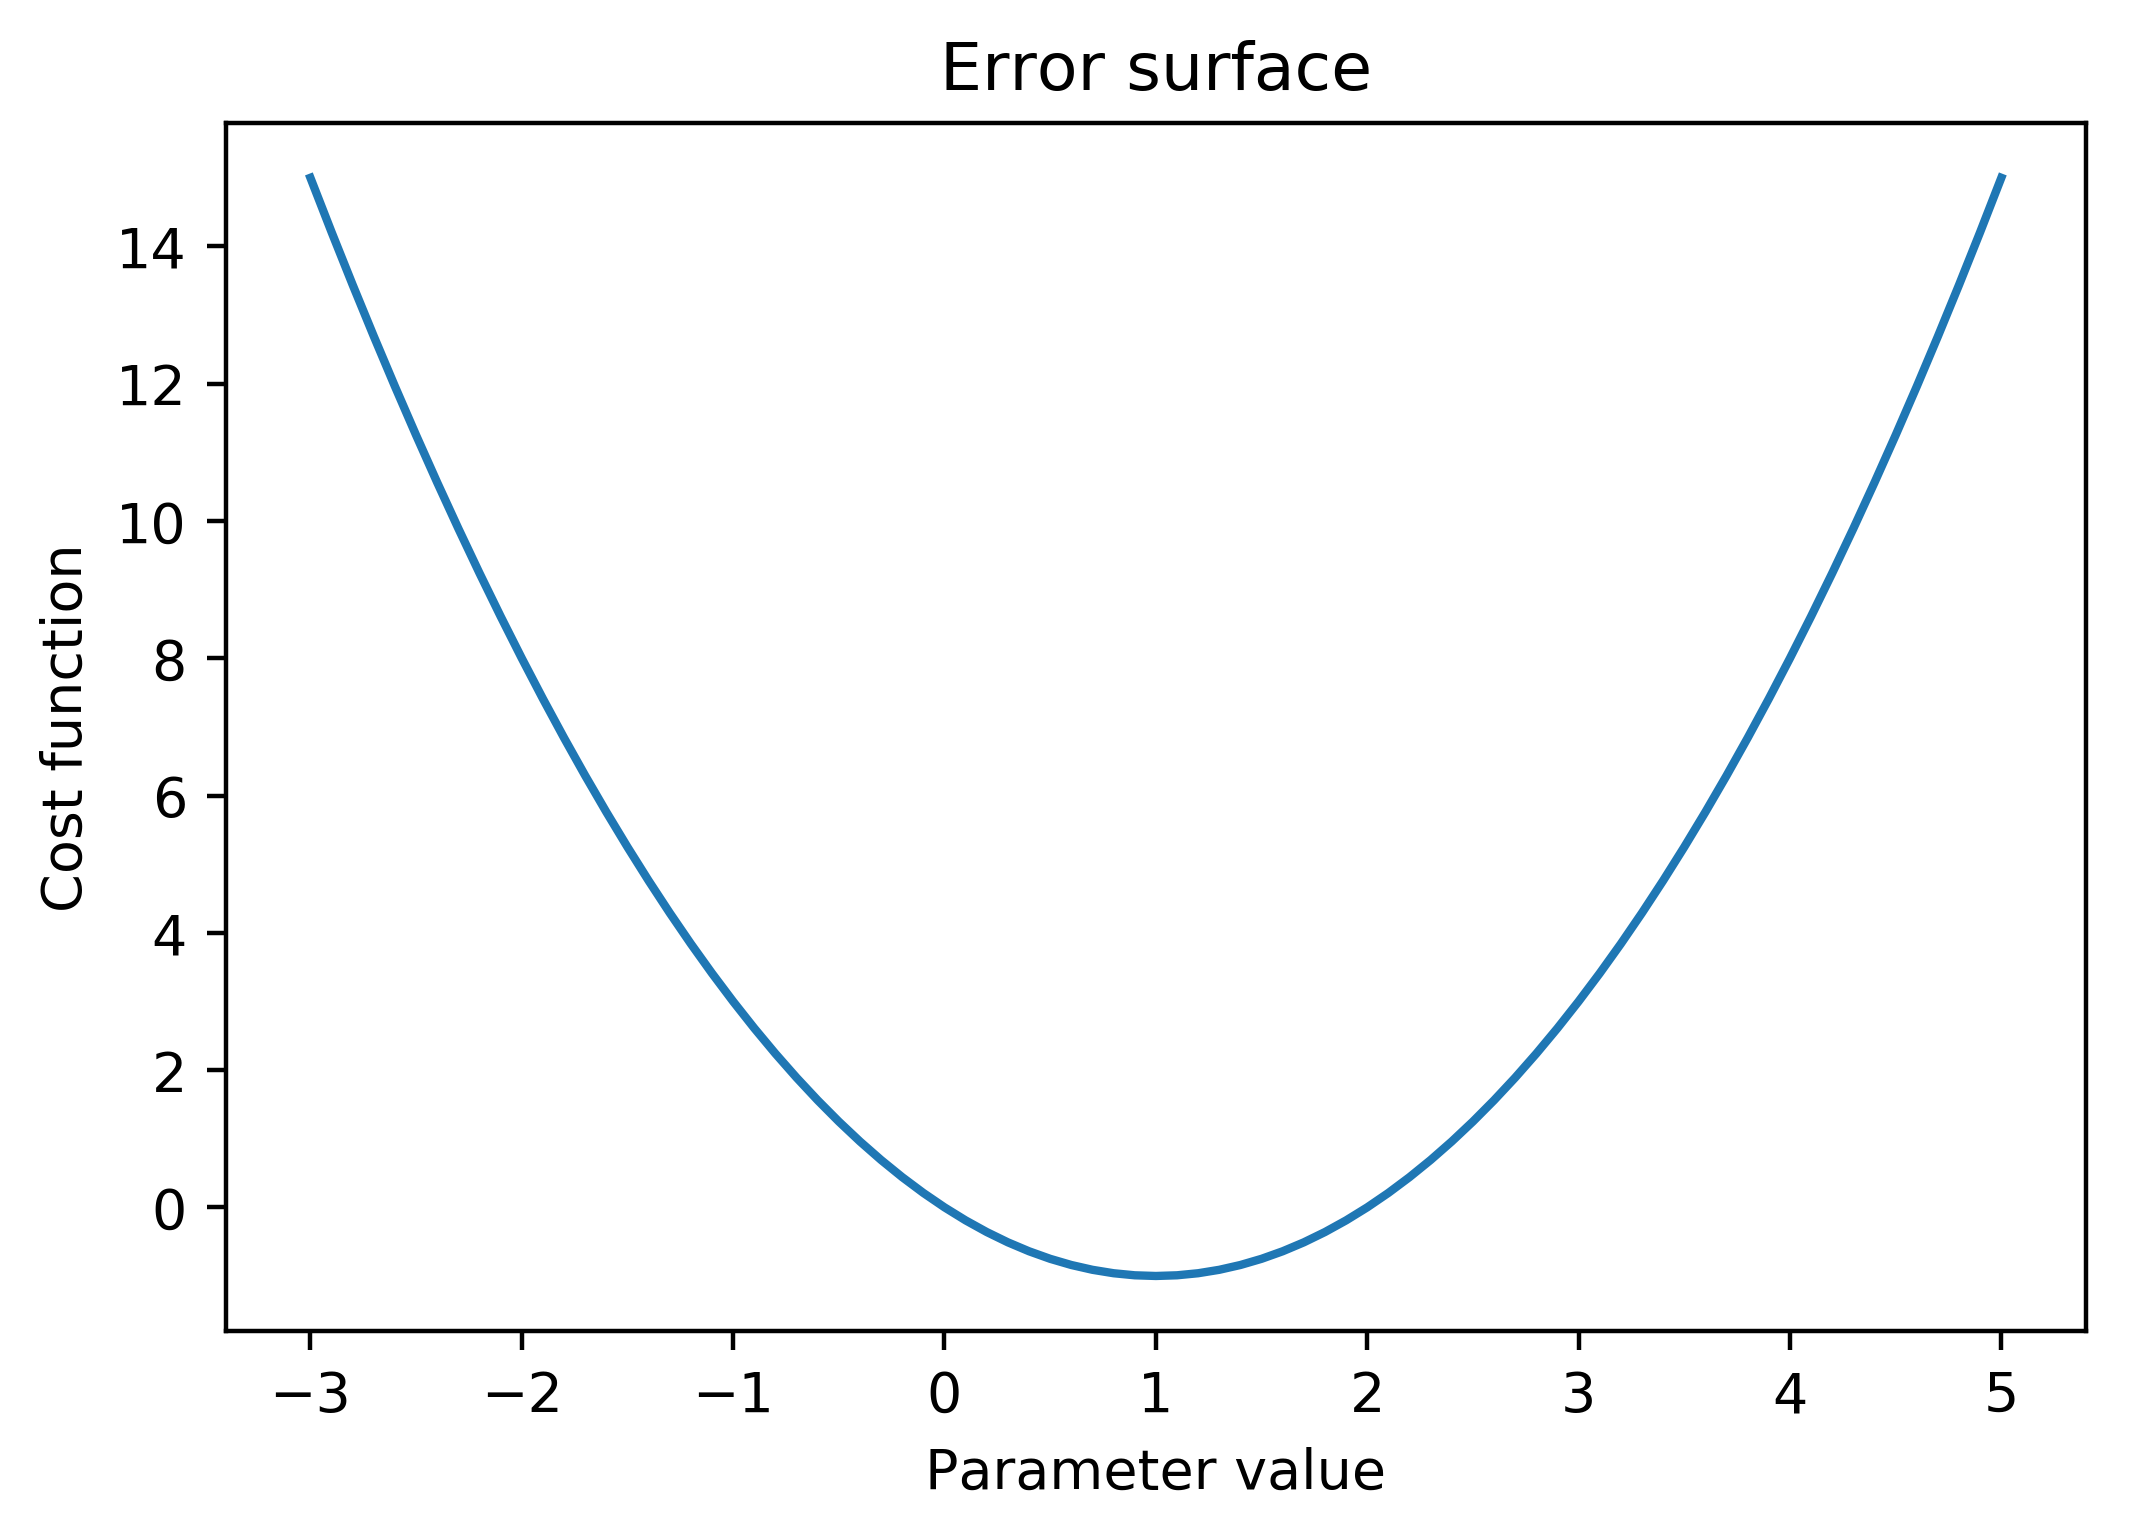

In [8]:
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')

In [9]:
def gradient(X):
    return (2*X) - 2

In [10]:
x_start = 4.5

In [11]:
learning_rate = 0.75

In [12]:
x_next = x_start - gradient(x_start)*learning_rate
x_next

-0.75

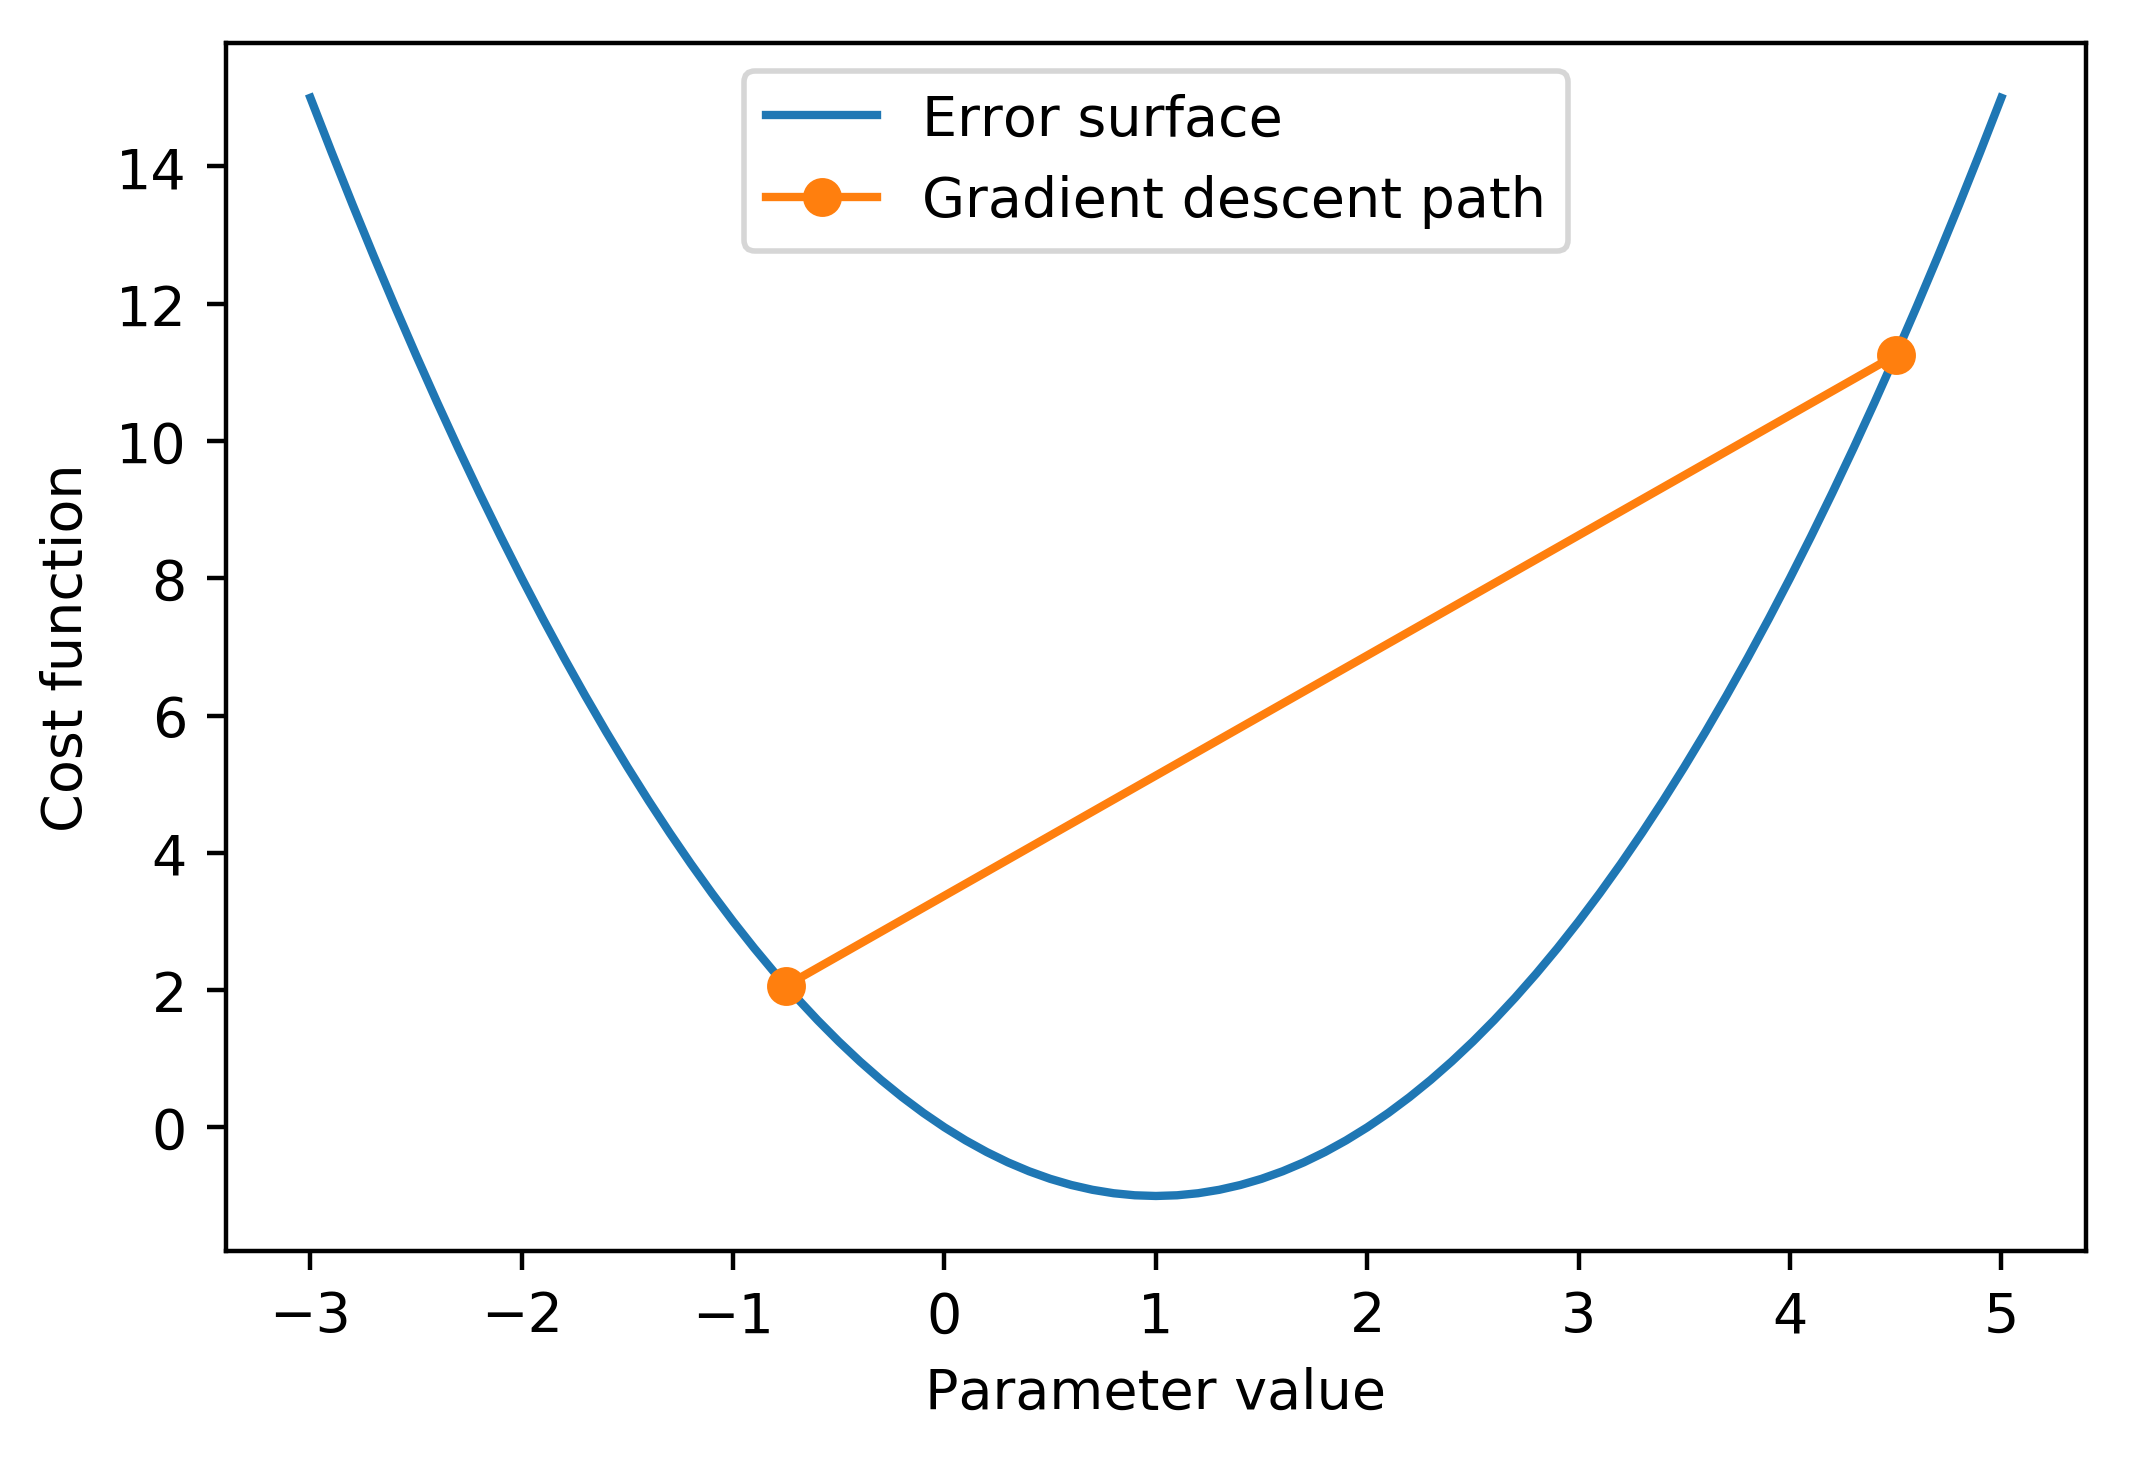

In [13]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

In [14]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1,iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1] - (derivative*learning_rate)

In [15]:
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

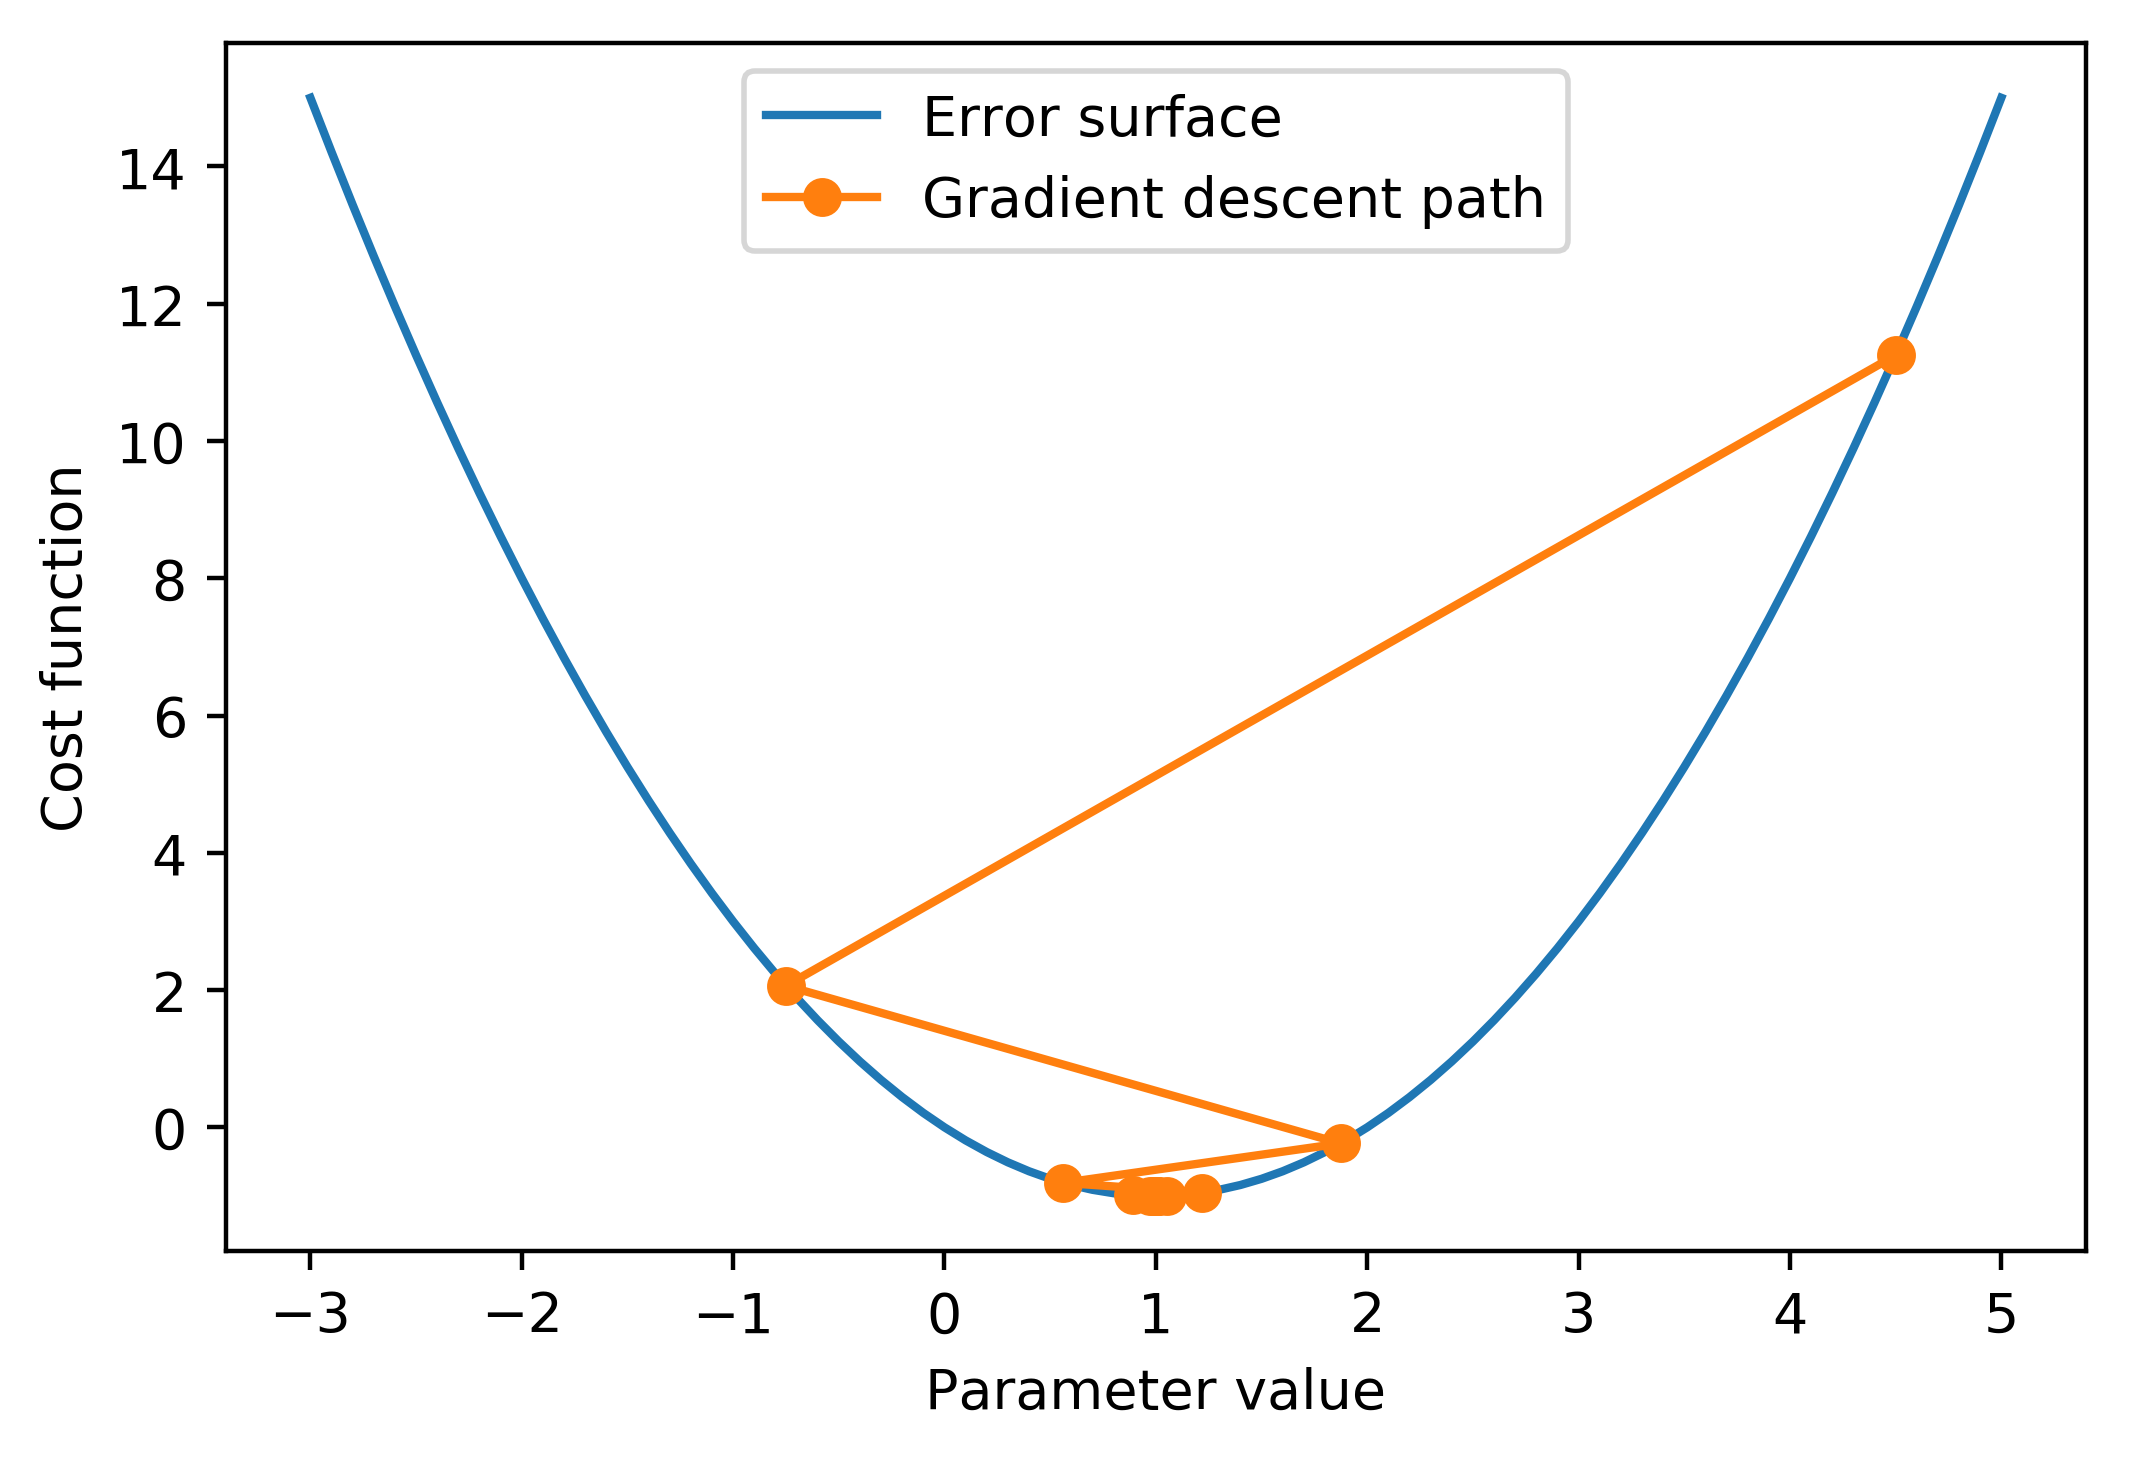

In [16]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, cost_function(x_path), '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

# Assumptions of Logistic Regression

Note: adjust the path in the following cell to the location where you saved the cleaned data from Chapter 1.

In [17]:
df = pd.read_csv('../Data/Chapter_1_cleaned_data.csv')

Subset column list to features as in Chapter 3

In [18]:
features_response = df.columns.tolist()

In [19]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [20]:
features_response[-5:]

['graduate school', 'high school', 'none', 'others', 'university']

In [21]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [22]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [23]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


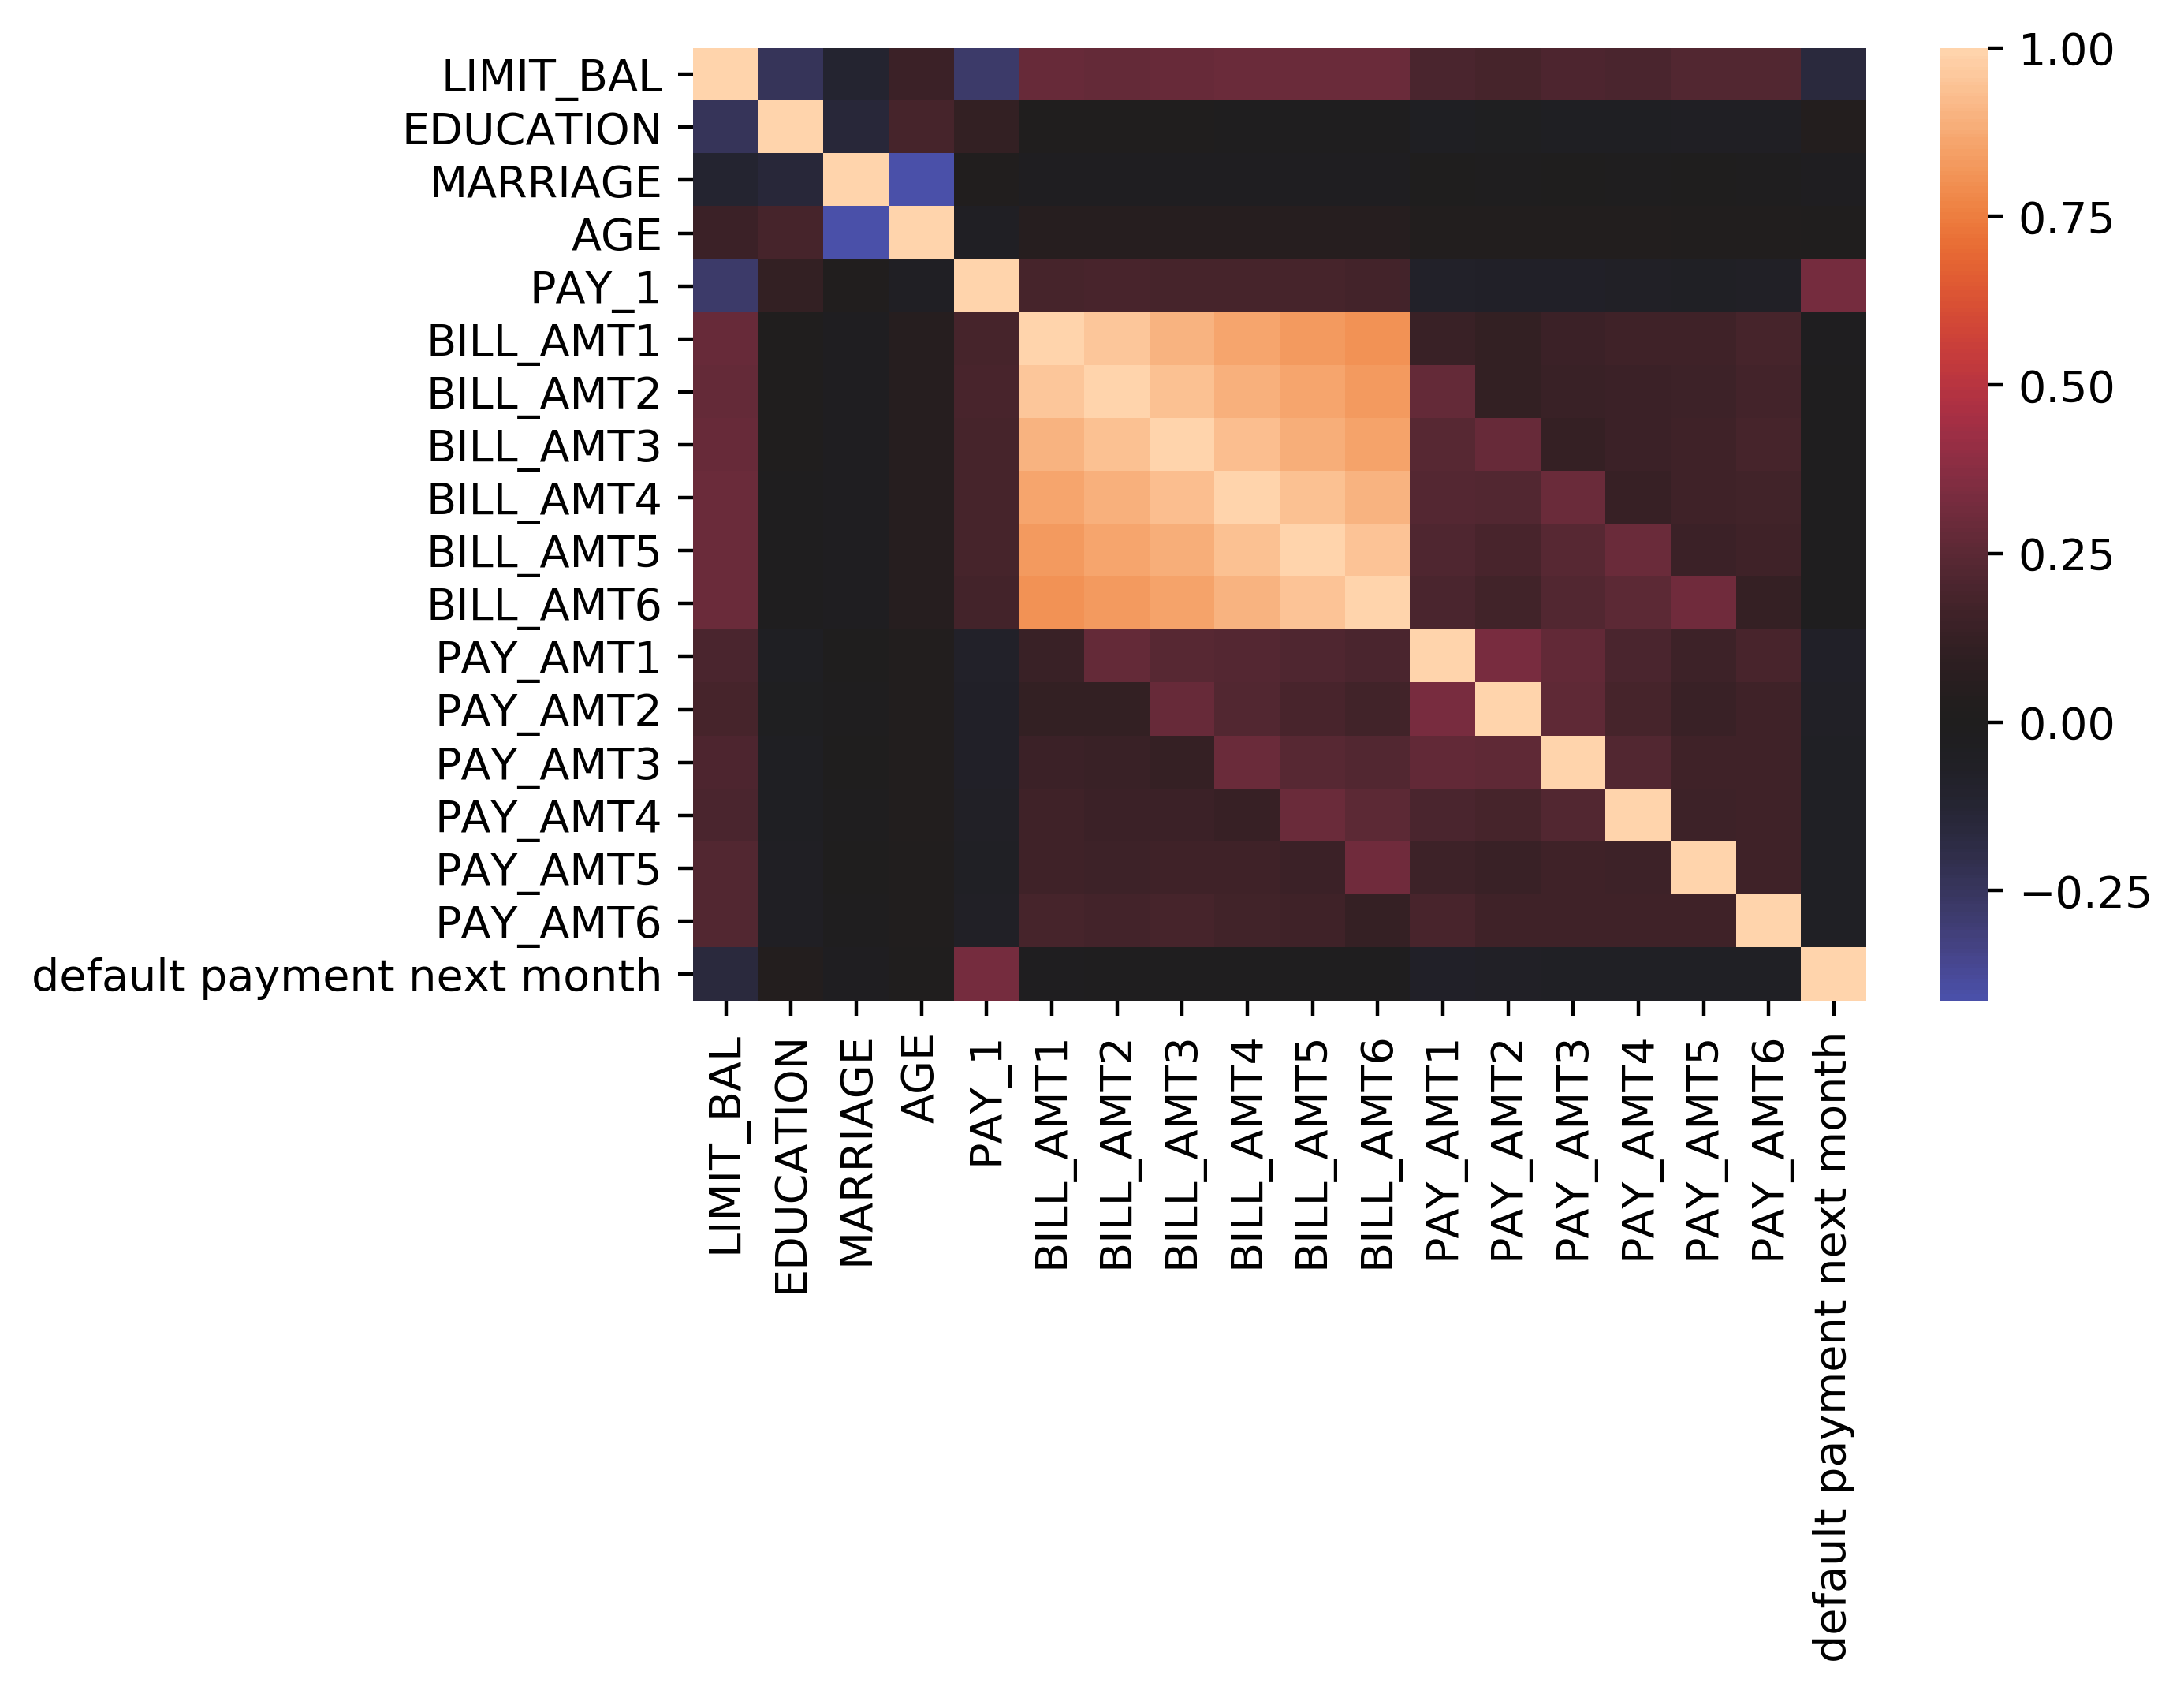

In [24]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [25]:
from sklearn.datasets import make_regression

In [26]:
X_syn_lin, y_syn_lin = make_regression(n_samples=100, n_features=1, n_informative=1,
                       n_targets=1, bias=0.0, effective_rank=None,
                       tail_strength=0.5, noise=10.0, shuffle=True,
                       coef=False, random_state=24)

In [27]:
from scipy.stats import linregress

In [28]:
m, b, r, p, std = linregress(X_syn_lin.reshape(len(X_syn_lin),), y_syn_lin)

In [29]:
x_regression = np.array([-3, 3])
y_regression = m*x_regression + b

Text(0.5, 1.0, 'Synthetic linear data and line of best fit')

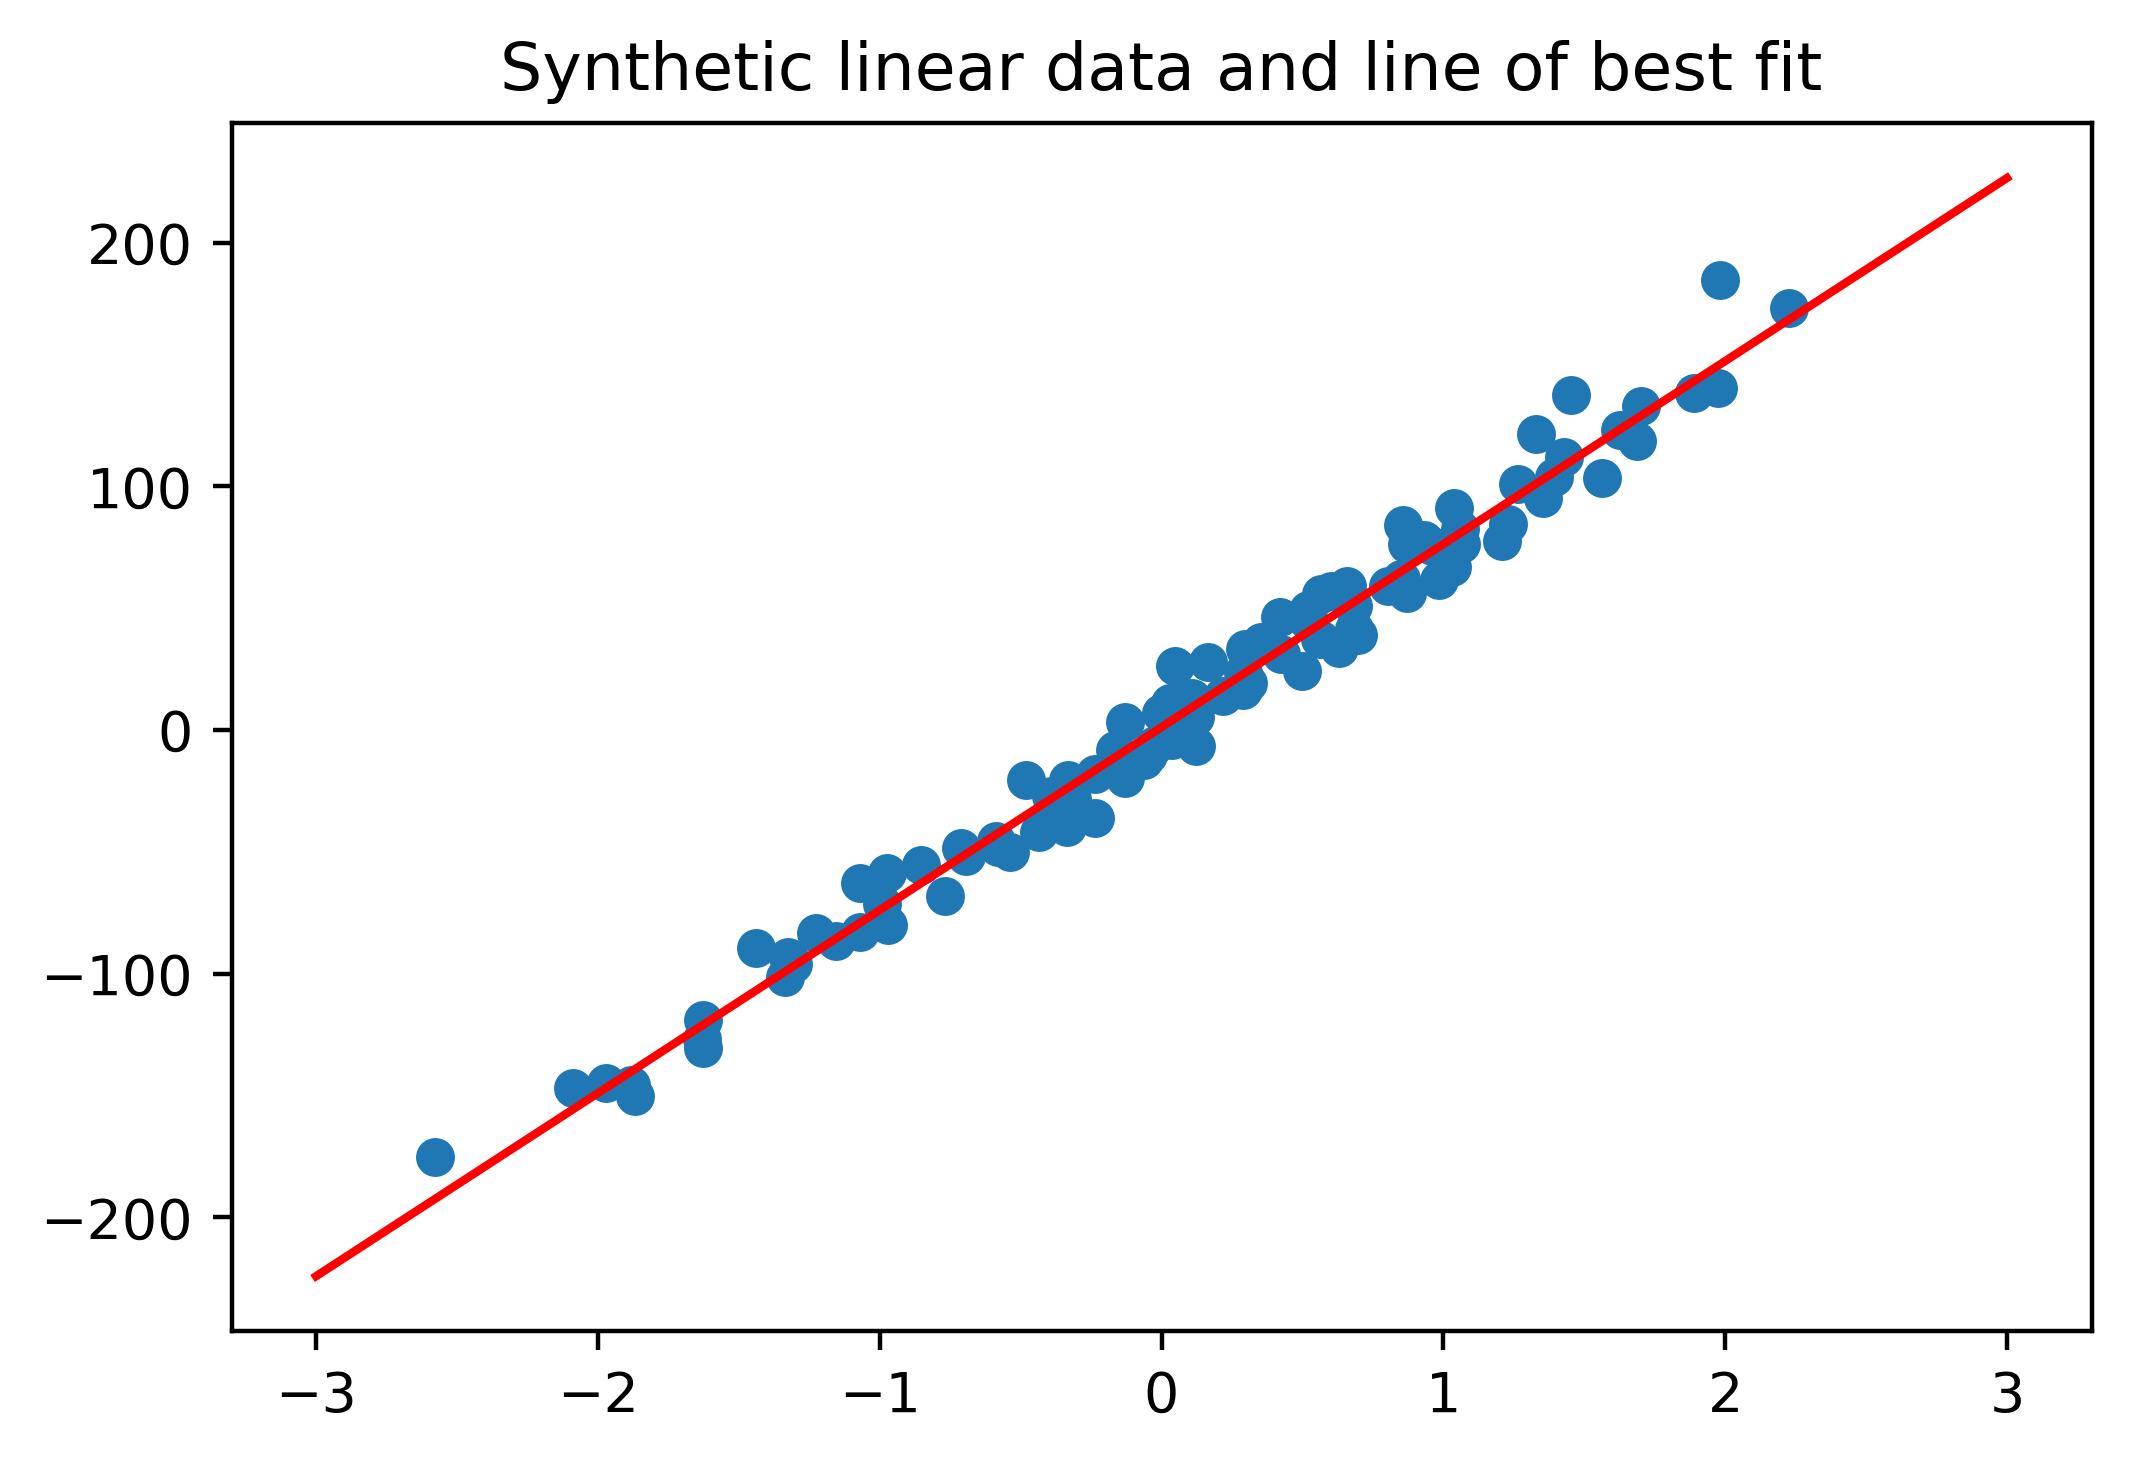

In [30]:
plt.scatter(X_syn_lin, y_syn_lin)
plt.plot(x_regression, y_regression, 'r-')
plt.title('Synthetic linear data and line of best fit')

In [31]:
X_syn_lin = np.append(X_syn_lin, 10)
y_syn_lin = np.append(y_syn_lin, 200)

In [32]:
m, b, r, p, std = linregress(X_syn_lin.reshape(len(X_syn_lin),), y_syn_lin)

In [33]:
x_regression = np.array([-3, 10])
y_regression = m*x_regression + b

Text(0.5, 1.0, 'Synthetic linear data with outlier and line of best fit')

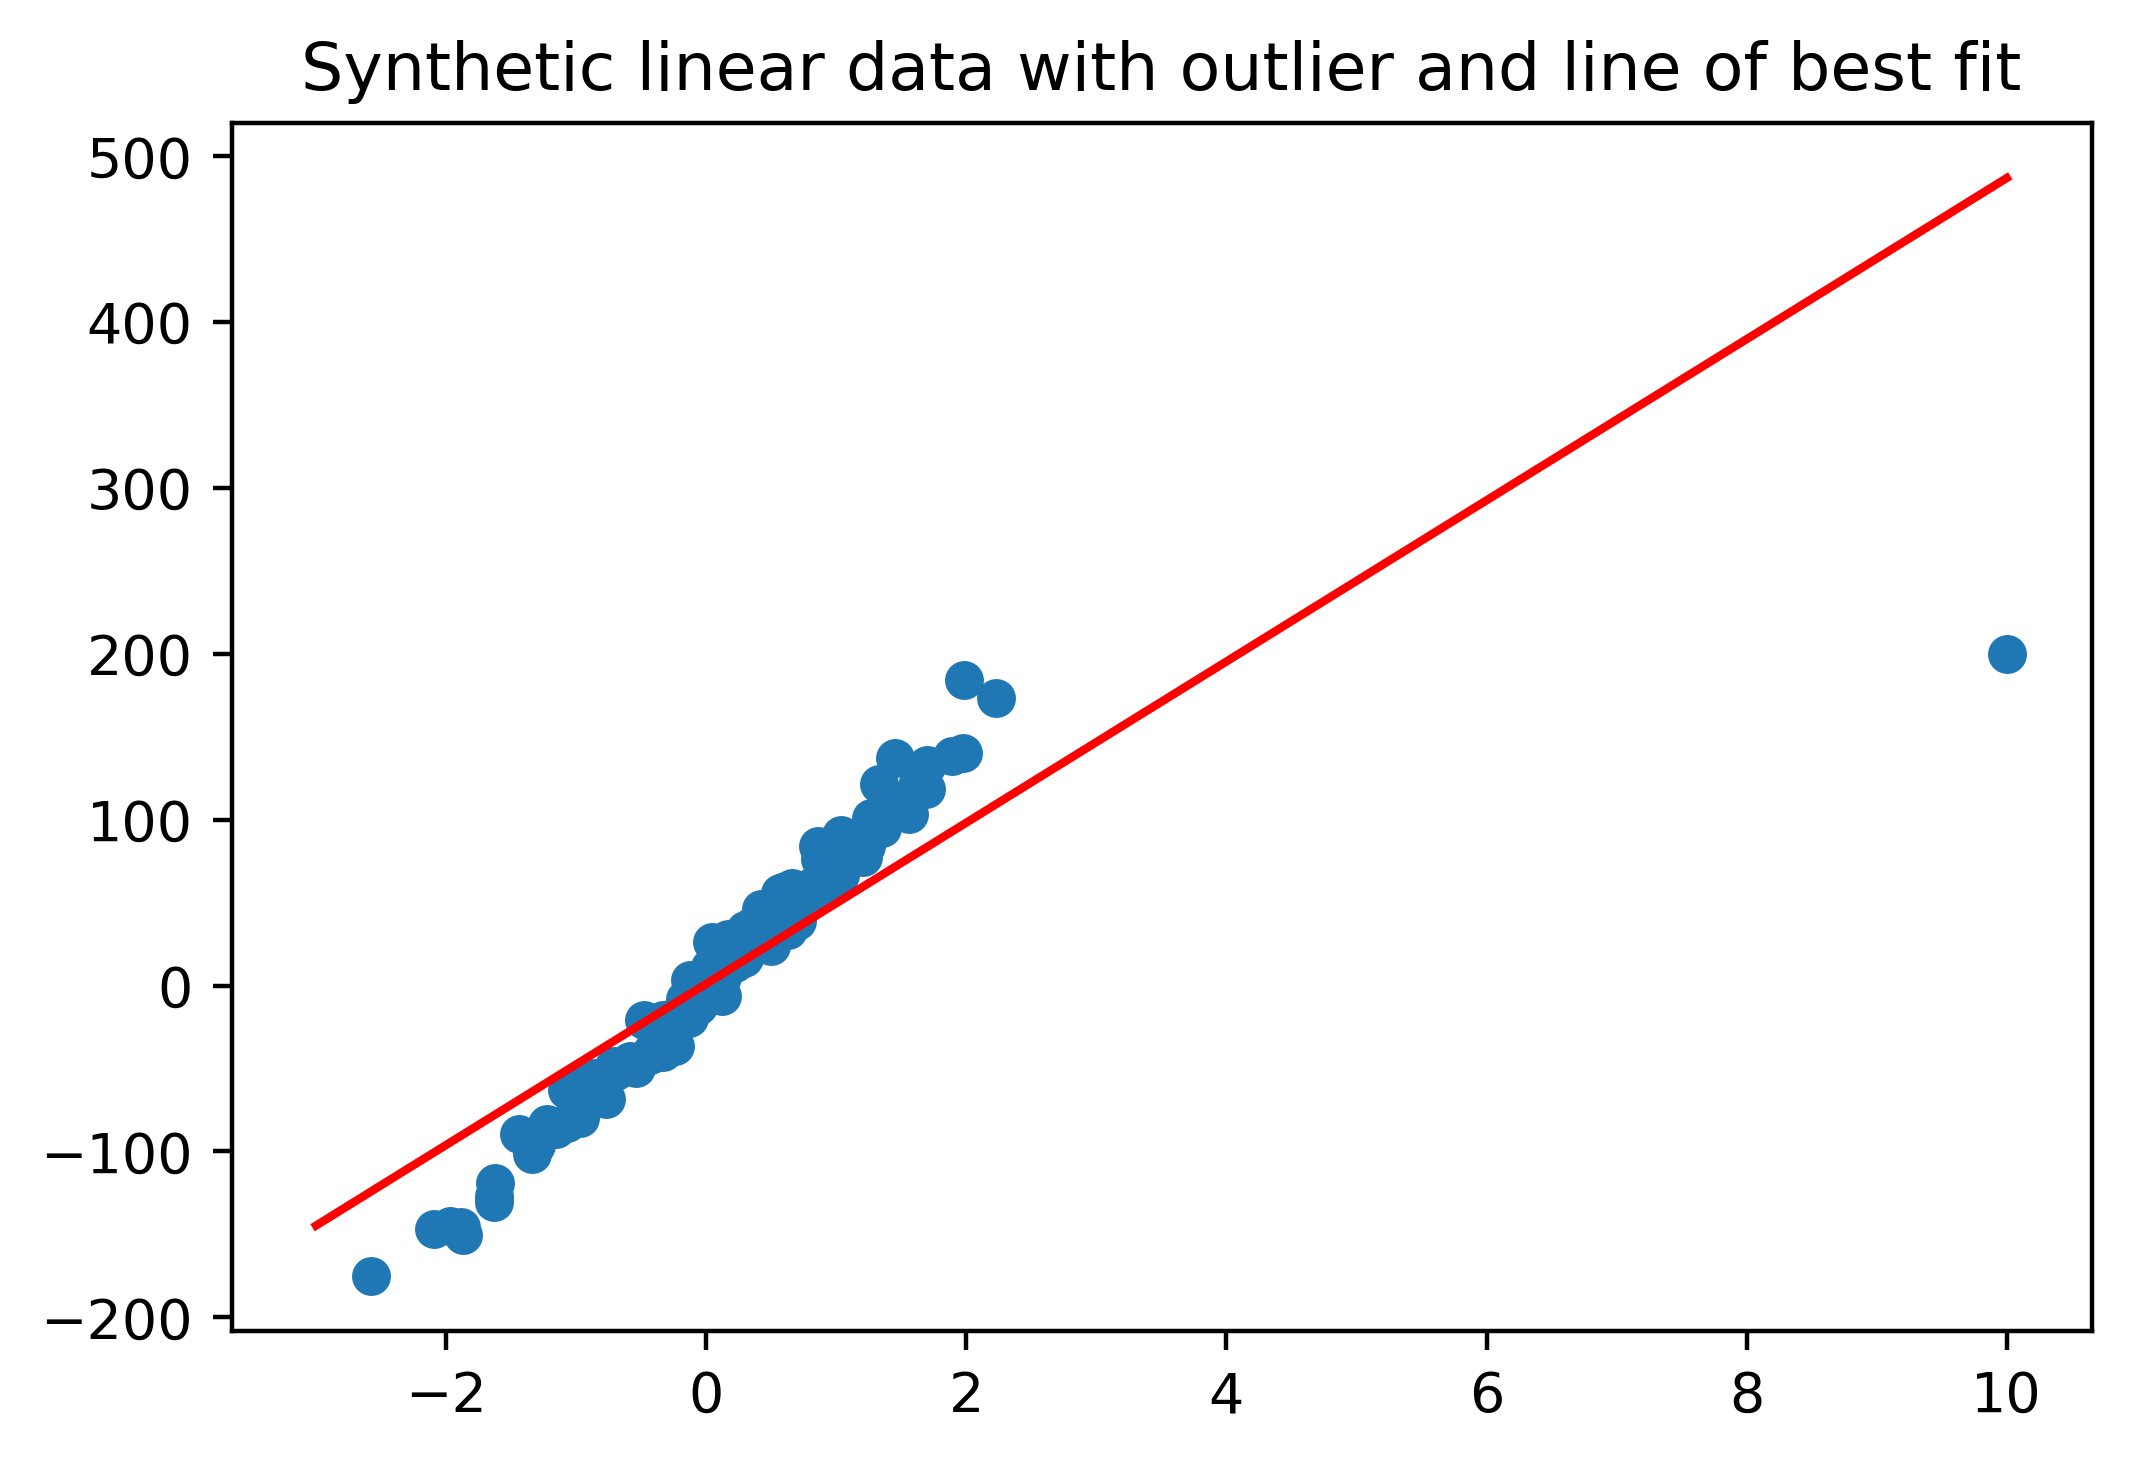

In [34]:
plt.scatter(X_syn_lin, y_syn_lin)
plt.plot(x_regression, y_regression, 'r-')
plt.title('Synthetic linear data with outlier and line of best fit')

# The Motivation for Regularization: the Bias-Variance Trade-off
Generate quadratic data with random noise to illustrate this.

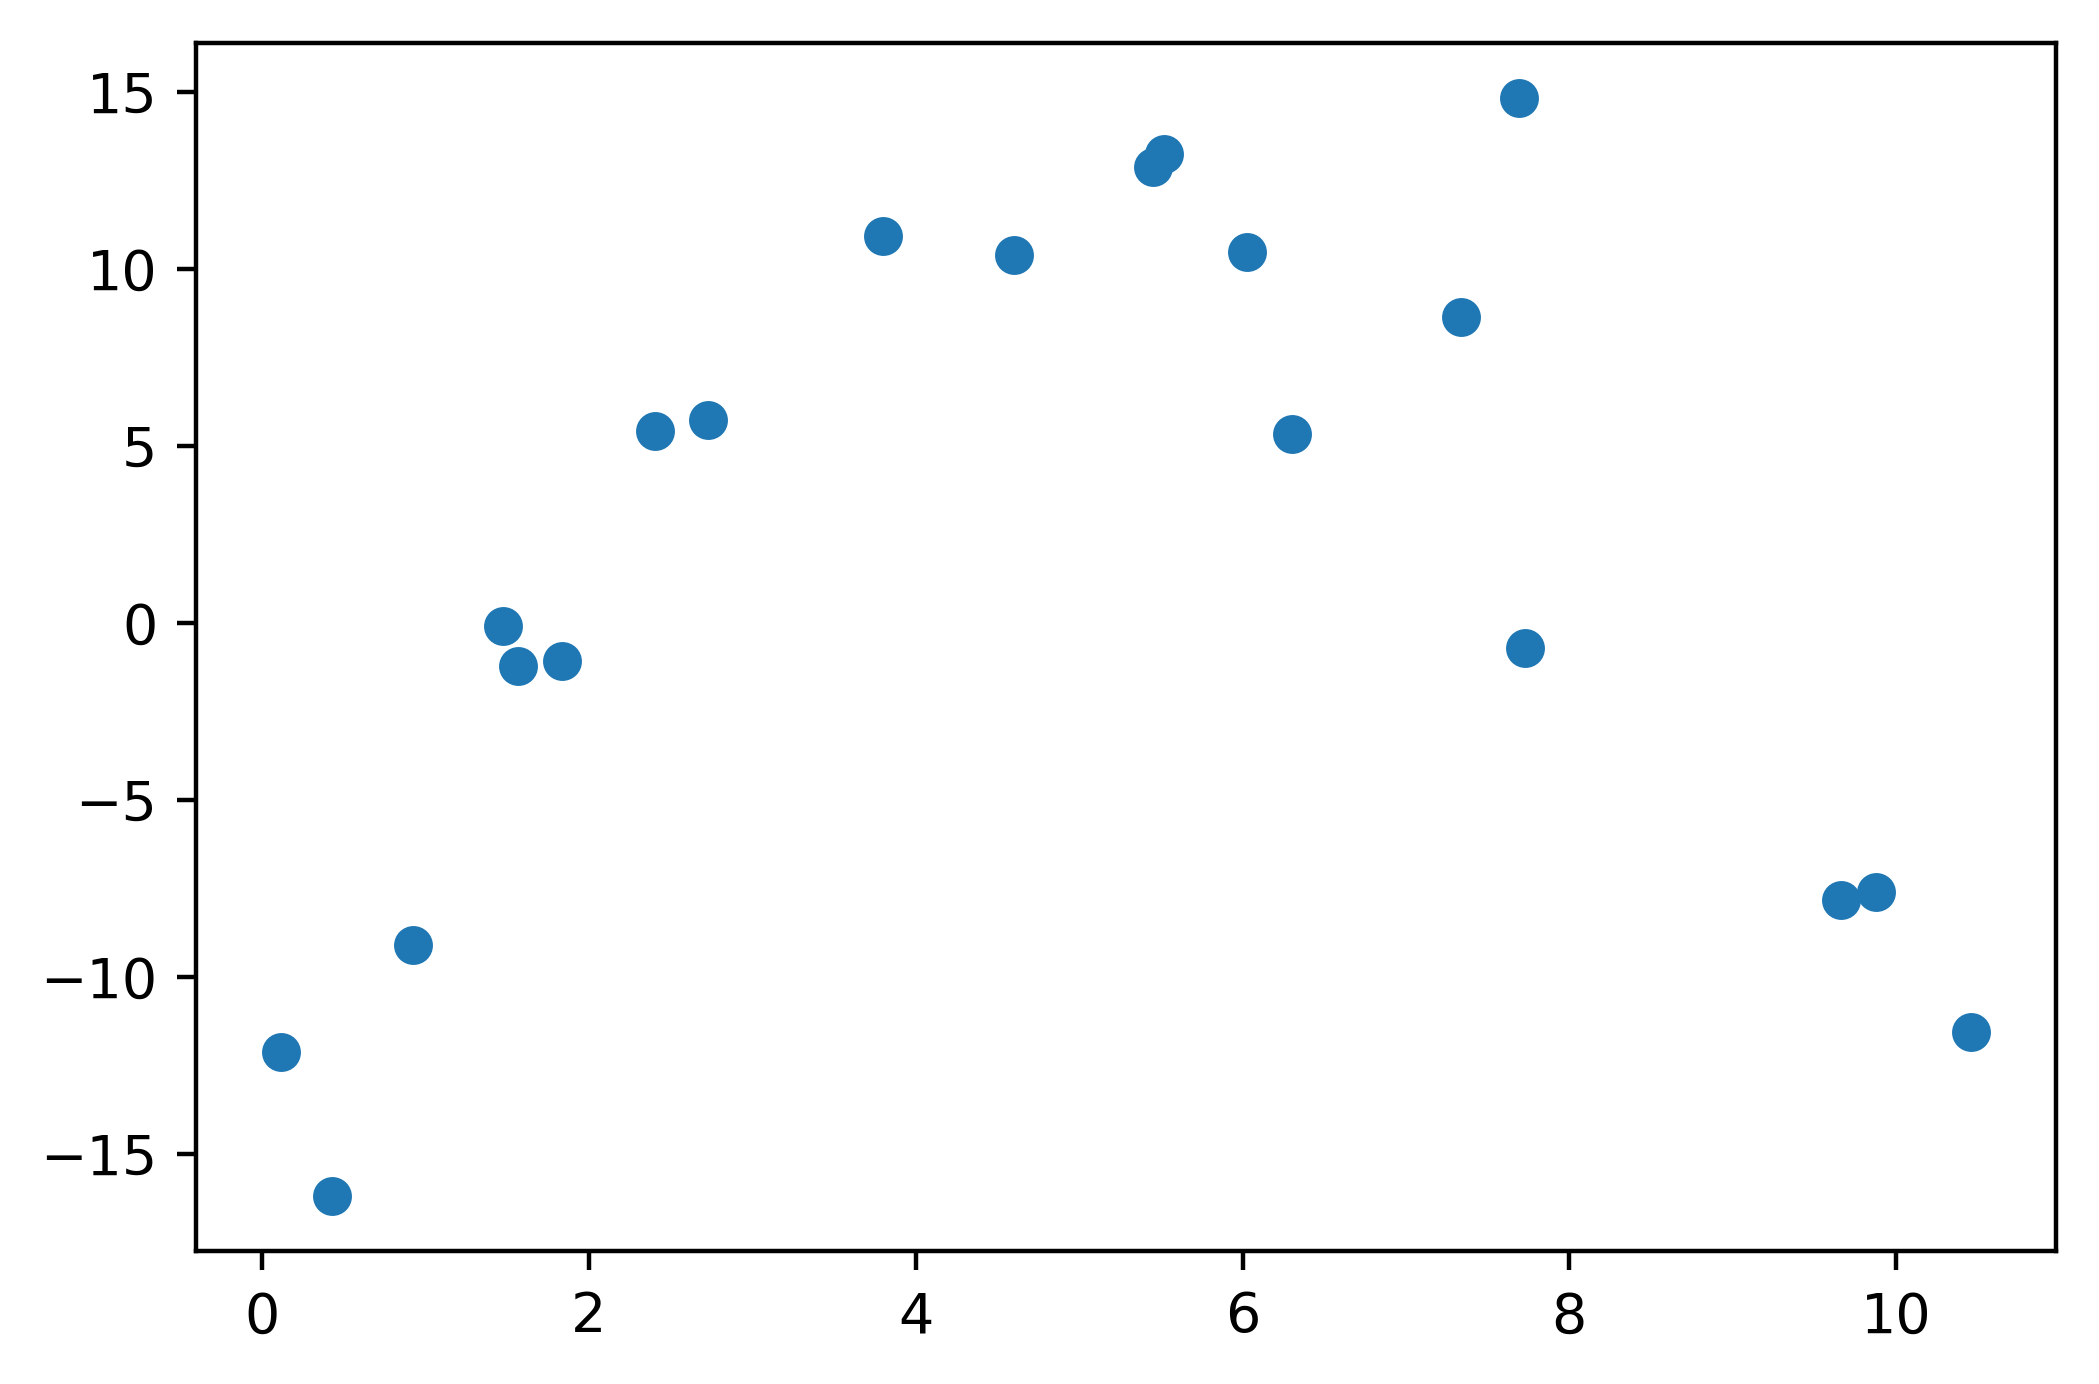

In [35]:
np.random.seed(seed=9)
n_points = 20
X = np.random.uniform(0, 11, n_points)
X = np.sort(X)
Y = (-X+2) * (X-9) + np.random.normal(0, 3, n_points)
plt.scatter(X, Y)

In [36]:
lin_fit = np.polyfit(X, Y, 1)

Function to take in the polynomial coefficients and produce the y values

In [37]:
def poly_fun(X, p):
    Y = np.zeros_like(X)
    power = len(p)-1
    for coefficient in p:
        Y = Y + coefficient*X**power
        power = power - 1
    return Y

In [38]:
lin_fit

array([ 0.44464616, -0.61869372])

In [39]:
poly_fun(X,lin_fit)

array([-0.56795261, -0.42917123, -0.2075489 ,  0.03588094,  0.07638692,
        0.19702737,  0.45030033,  0.59479584,  1.07117738,  1.42827491,
        1.80618691,  1.83602902,  2.06083994,  2.18273629,  2.64318106,
        2.8007159 ,  2.81695454,  3.67843349,  3.77355591,  4.03257388])

Plot the models over a more continuous range of values

In [40]:
curve_x = np.linspace(0,11,333)

In [41]:
cmap = mpl.cm.get_cmap('tab10')

(-20, 20)

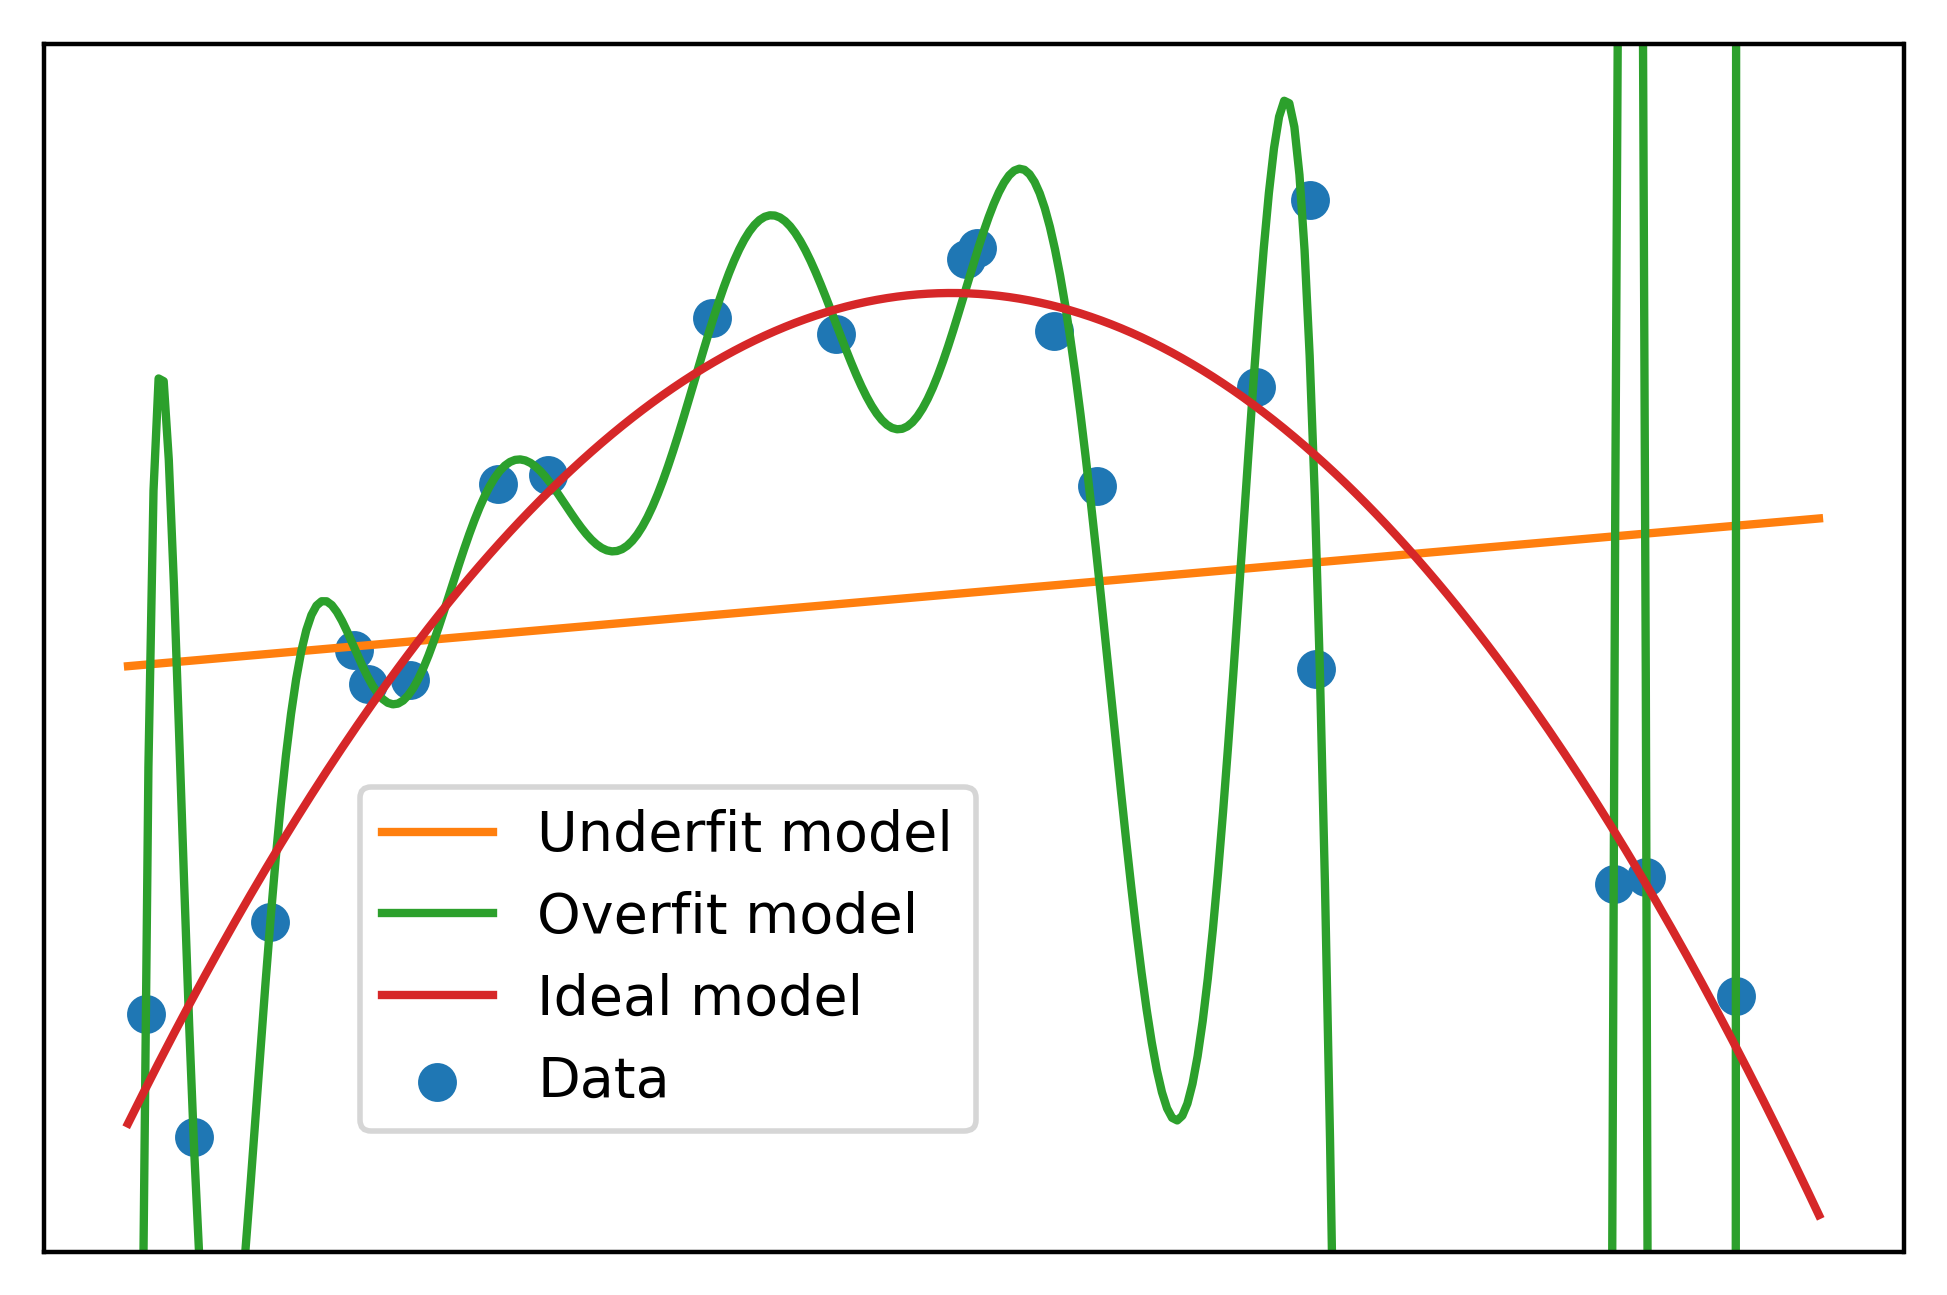

In [42]:
plt.scatter(X, Y, label='Data', color=cmap(0))
plt.plot(curve_x, poly_fun(curve_x,lin_fit), label='Underfit model', color=cmap(1))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 15)), label='Overfit model', color=cmap(2))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 2)), label='Ideal model', color=cmap(3))
plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

# Exercise 17: Generating and Modeling Synthetic Classification Data

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [44]:
X_synthetic, y_synthetic = \
make_classification(n_samples=1000, n_features=200, n_informative=3, n_redundant=10,
                    n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None,
                    flip_y=0.01, class_sep=0.8, hypercube=True, shift=0.0, scale=1.0,
                    shuffle=True, random_state=24)

In [45]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


In [46]:
np.mean(y_synthetic)

0.501

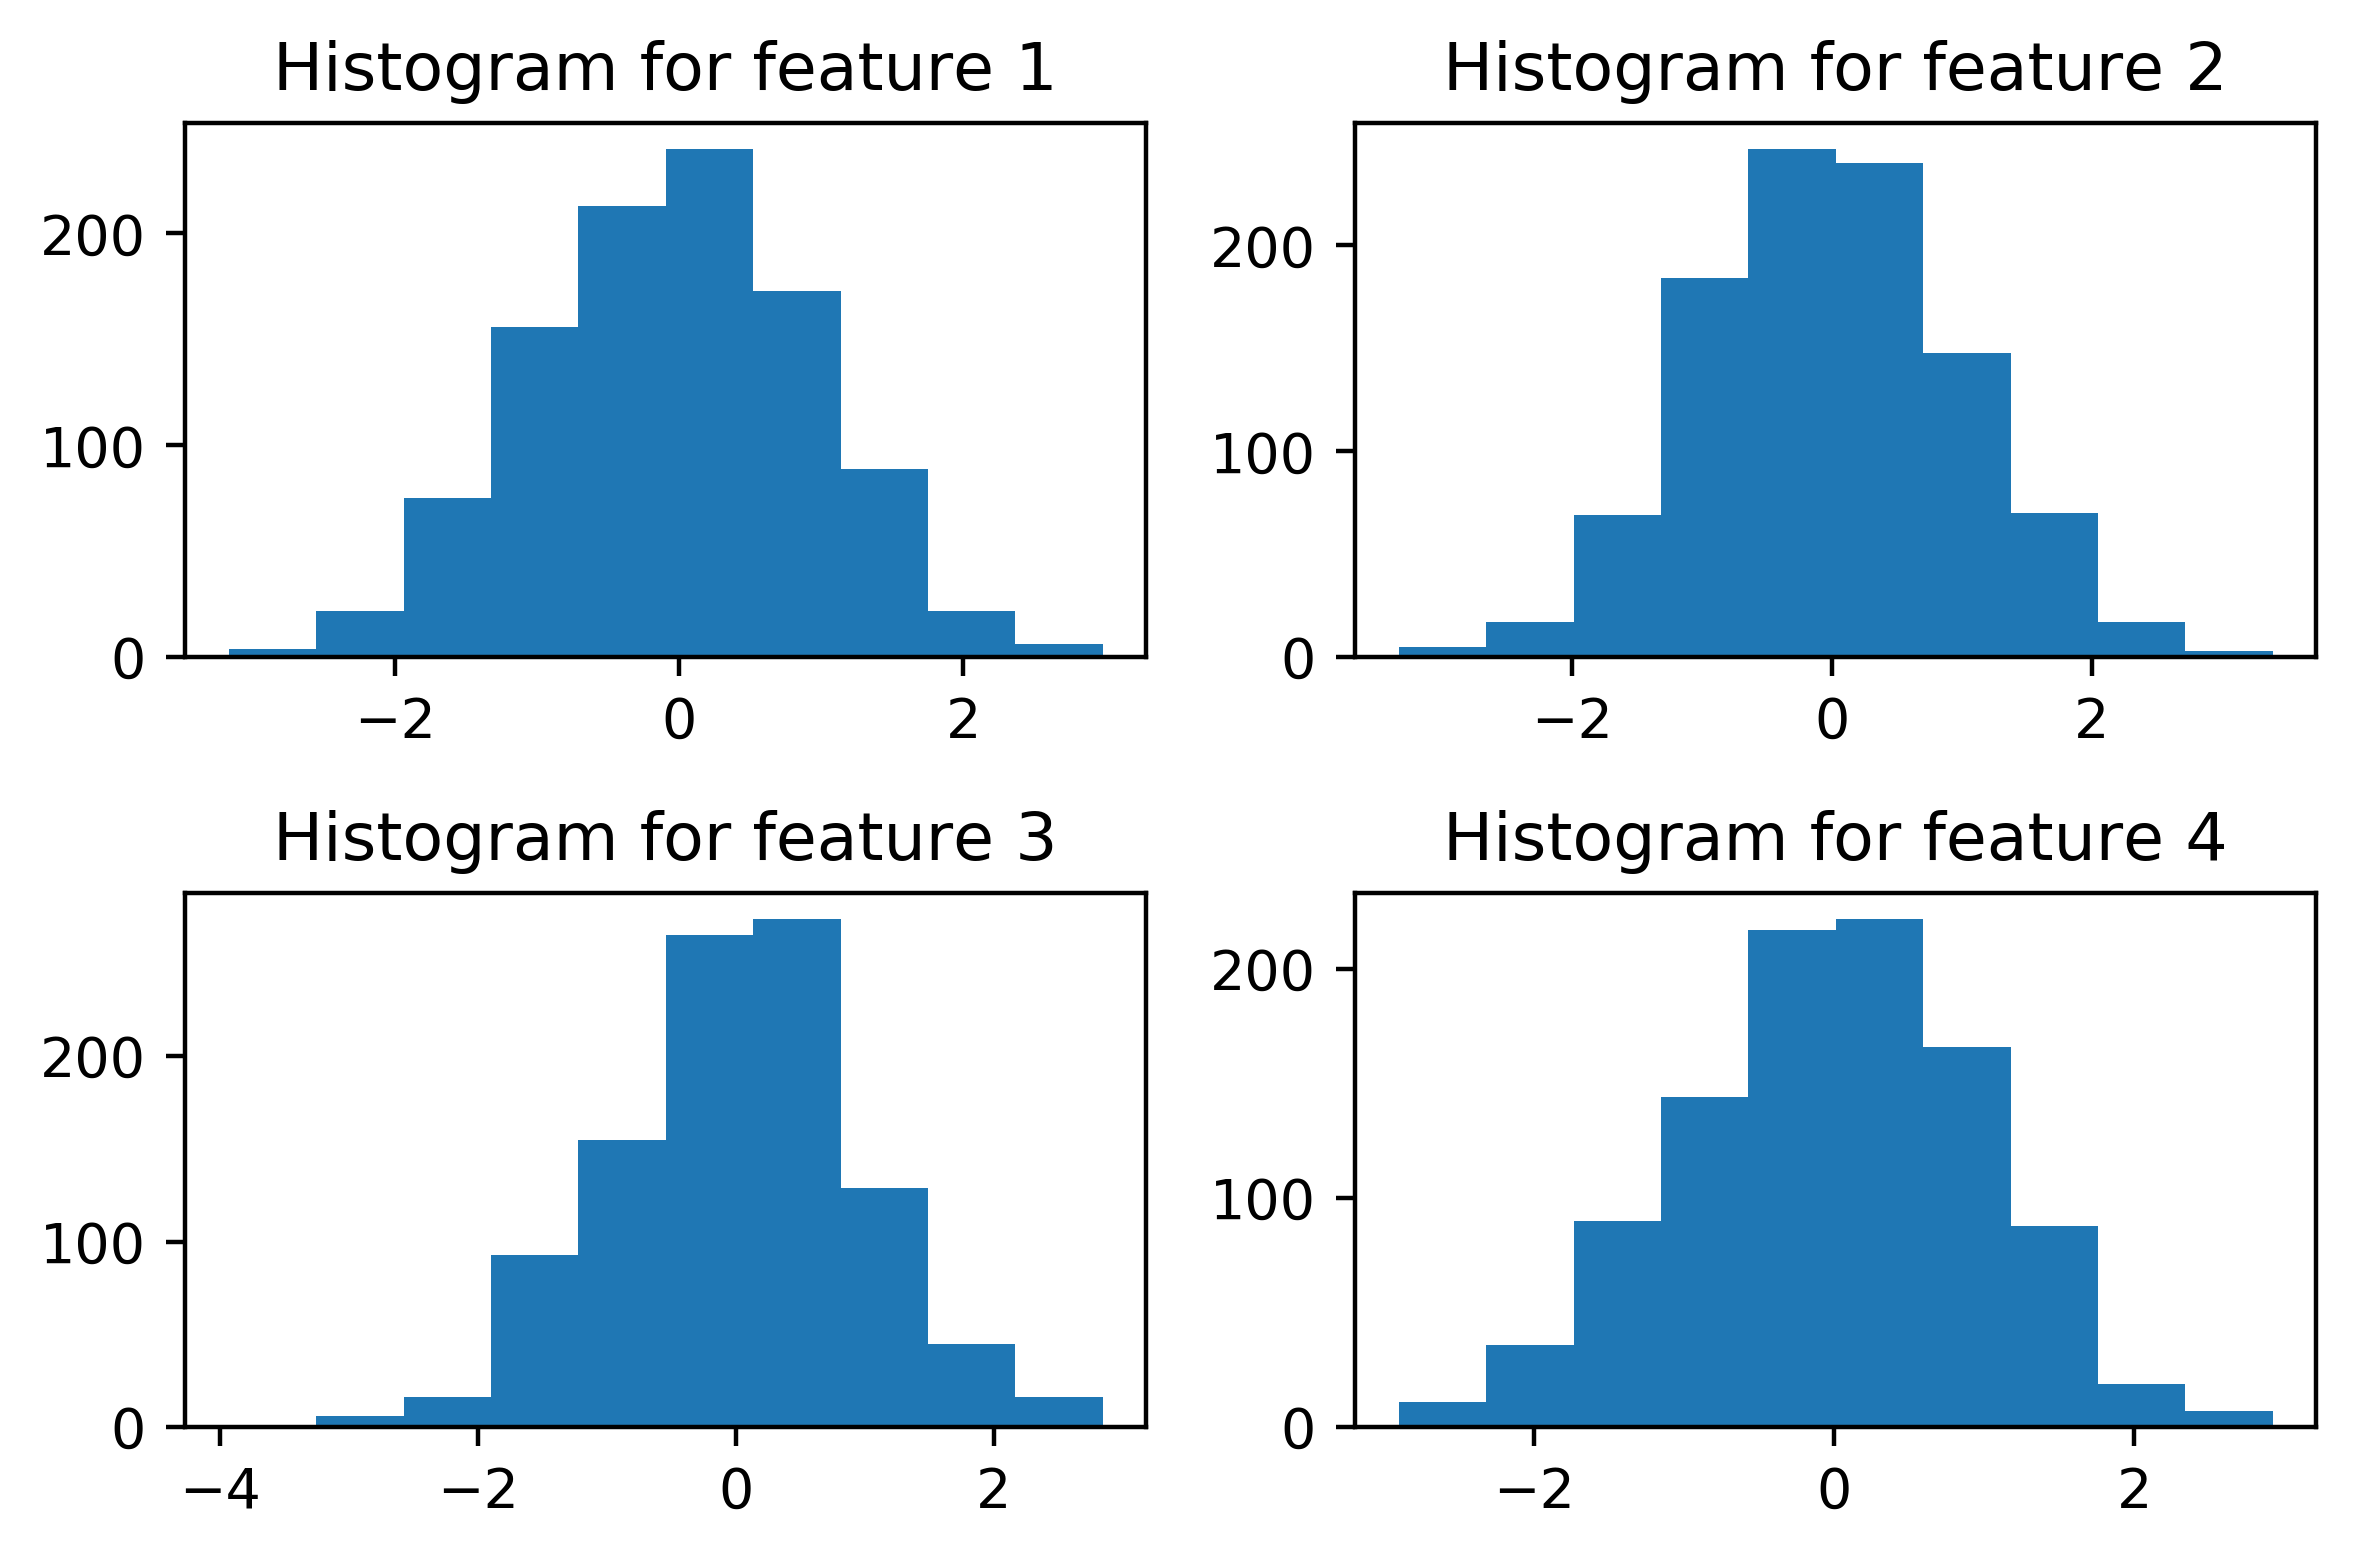

In [47]:
for plot_index in range(4):
    plt.subplot(2,2,plot_index+1)
    plt.hist(X_synthetic[:,plot_index])
    plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [48]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
X_synthetic, y_synthetic,
test_size=0.2, random_state=24)

In [49]:
lr_syn = \
LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)

In [50]:
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)

In [52]:
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.9419937500000001

In [53]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)

In [54]:
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8074807480748075

In [55]:
# lr_syn.coef_

# Lasso (L1) and Ridge (L2) Regularization

Create arrays of polynomial features for training and plotting

In [56]:
poly_features = X.reshape(20,-1)
plot_features = curve_x.reshape(333,-1)
for power in range (2,16):
    power_array = X.reshape(20,-1)**power
    poly_features = np.append(poly_features, power_array.reshape(20,-1), axis=1)
    plot_power_array = curve_x.reshape(333,-1)**power
    plot_features = np.append(plot_features, plot_power_array.reshape(333,-1), axis=1)

Fit a linear regression with ridge penalty. Feature scaling is performed by the regression function.

In [57]:
from sklearn.linear_model import Ridge

In [58]:
regressor = Ridge(alpha=0.001, fit_intercept=True, normalize=True,
                        copy_X=True, max_iter=None, tol=0.001,
                        random_state=1)

In [59]:
regressor.fit(poly_features, Y)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=1, solver='auto', tol=0.001)

In [60]:
Y_pred = regressor.predict(plot_features)

(-20, 20)

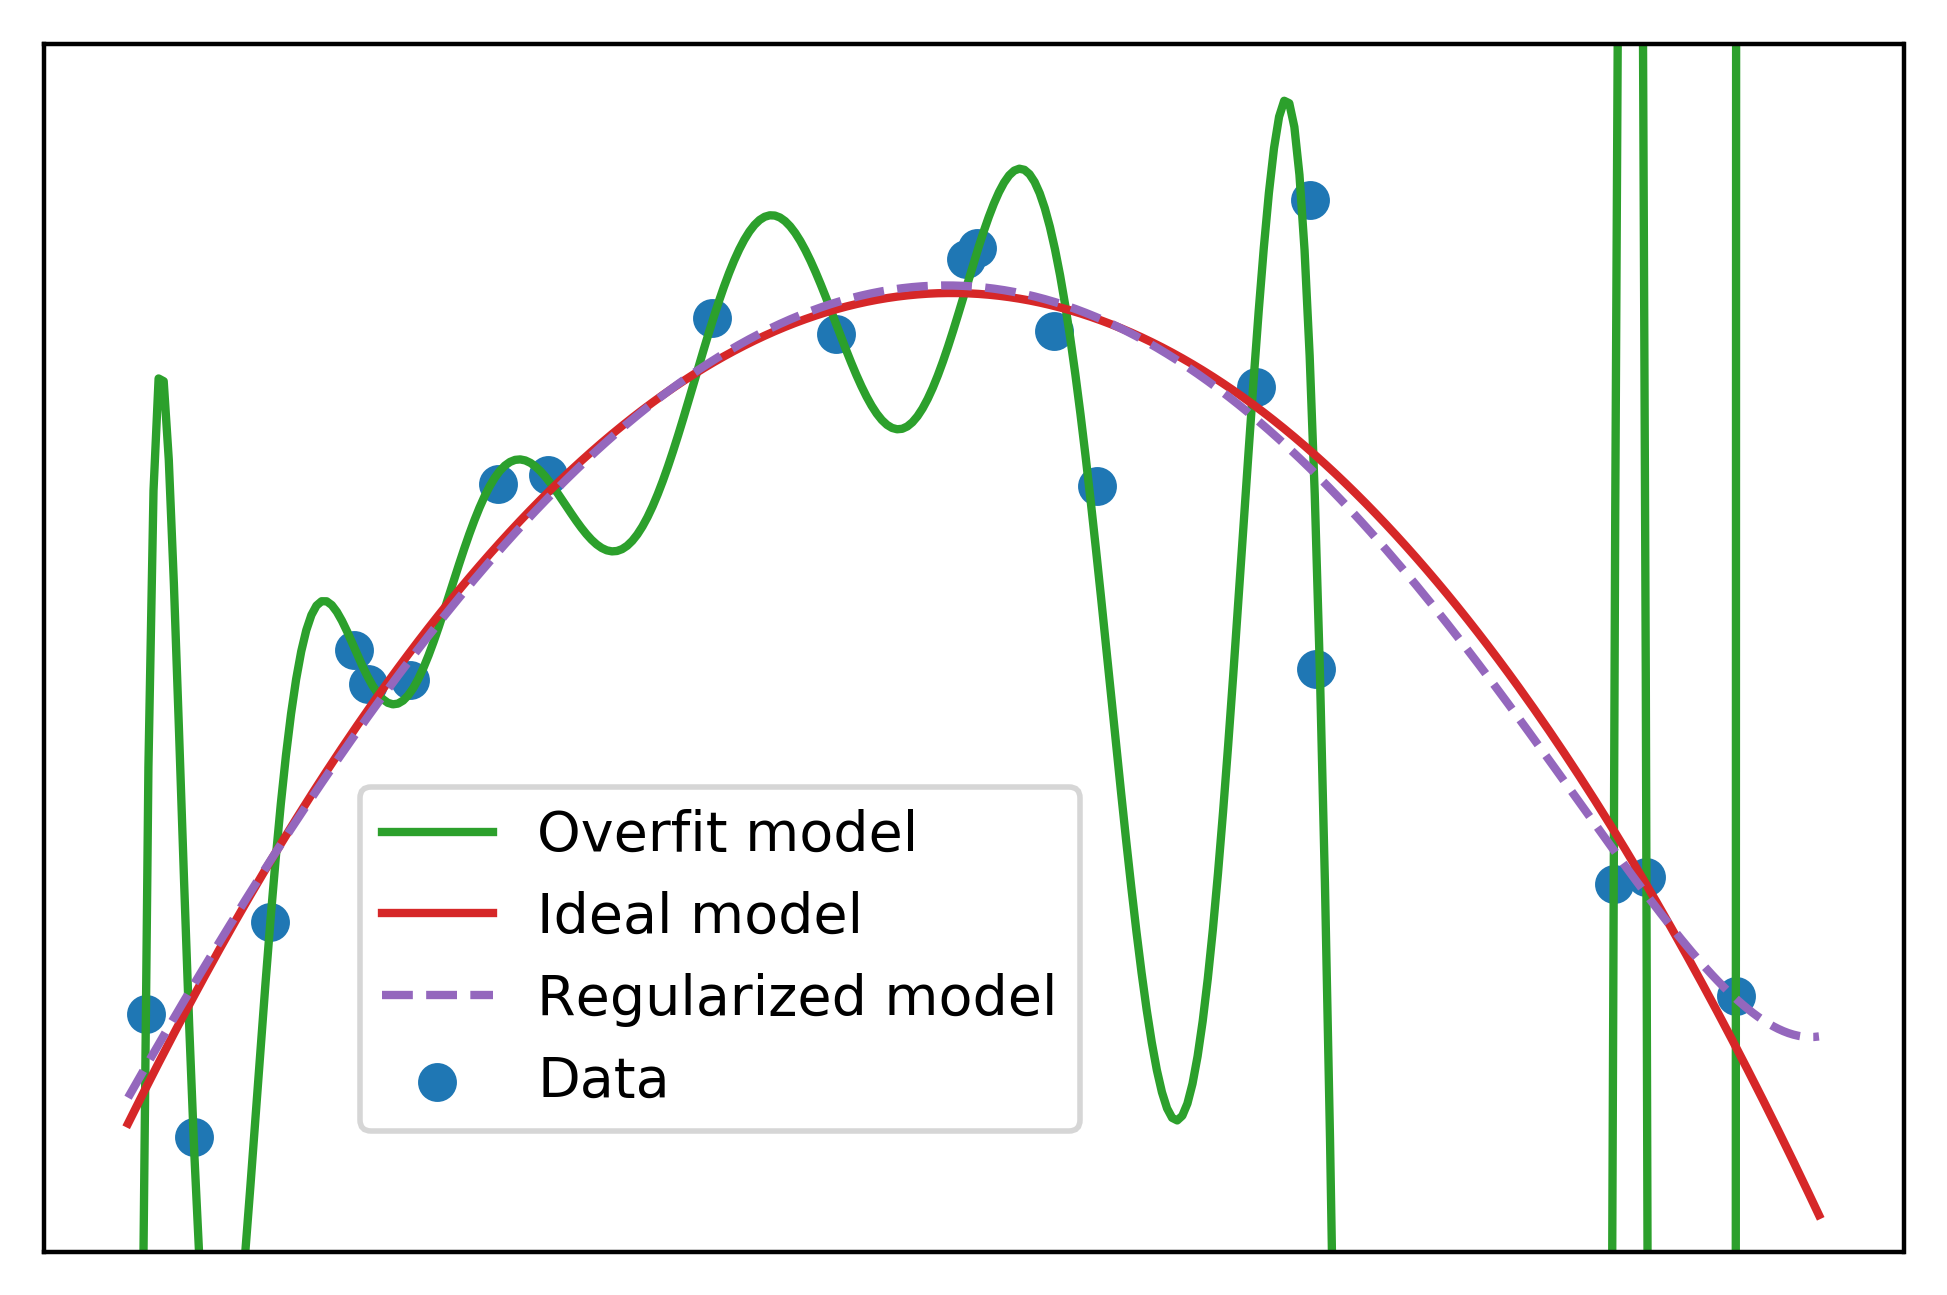

In [61]:
plt.scatter(X, Y, label='Data', color=cmap(0))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 15)), label='Overfit model', color=cmap(2))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 2)), label='Ideal model', color=cmap(3))
plt.plot(curve_x, Y_pred, label='Regularized model', color=cmap(4), linestyle='--')
plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])


# Cross Validation: Choosing the Regularization Parameter and Other Hyperparameters

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [63]:
n_folds = 4

Note for `StratifiedKFold`, `shuffle=False` by default, the opposite behavior of `train_test_split` which we have been using.

In [64]:
k_folds = KFold(n_splits=n_folds, shuffle=False, random_state=1)

In [65]:
def plot_kfolds(k_folds_iterator):
    fold_counter = 0
    for train_index, test_index in k_folds_iterator.split(X_syn_train, y_syn_train):

        #Axis to hold the plot of this fold
        ax = plt.subplot(n_folds,1,fold_counter+1)

        #Background rectangle representing all samples
        n_train_samples = len(y_syn_train)
        rect = mpl.patches.Rectangle(xy=(0,0), width=n_train_samples, height=1)
        ax.add_patch(rect)

        #Plot each testing sample from this fold as a vertical line
        for this_text_ix in test_index:
            ax.plot([this_text_ix, this_text_ix], [0, 1], color=cmap(1),
                    linewidth=0.75)

        #Plot formatting
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(0, n_train_samples)
        ax.set_ylim(0,1)
        
        #Subplot titles
        if fold_counter == 0:
            ax.text(0.26, 1.2, 'Training data,',
                    transform=ax.transAxes, backgroundcolor = cmap(0))
            ax.text(0.45, 1.2, 'testing data:',
                    transform=ax.transAxes, backgroundcolor = cmap(1))
            ax.text(0.62, 1.2, 'fold {}'.format(fold_counter+1), transform=ax.transAxes)
        else:
            ax.text(0.45, 1.2, 'Fold {}'.format(fold_counter+1), transform=ax.transAxes)

        fold_counter += 1

    plt.tight_layout()

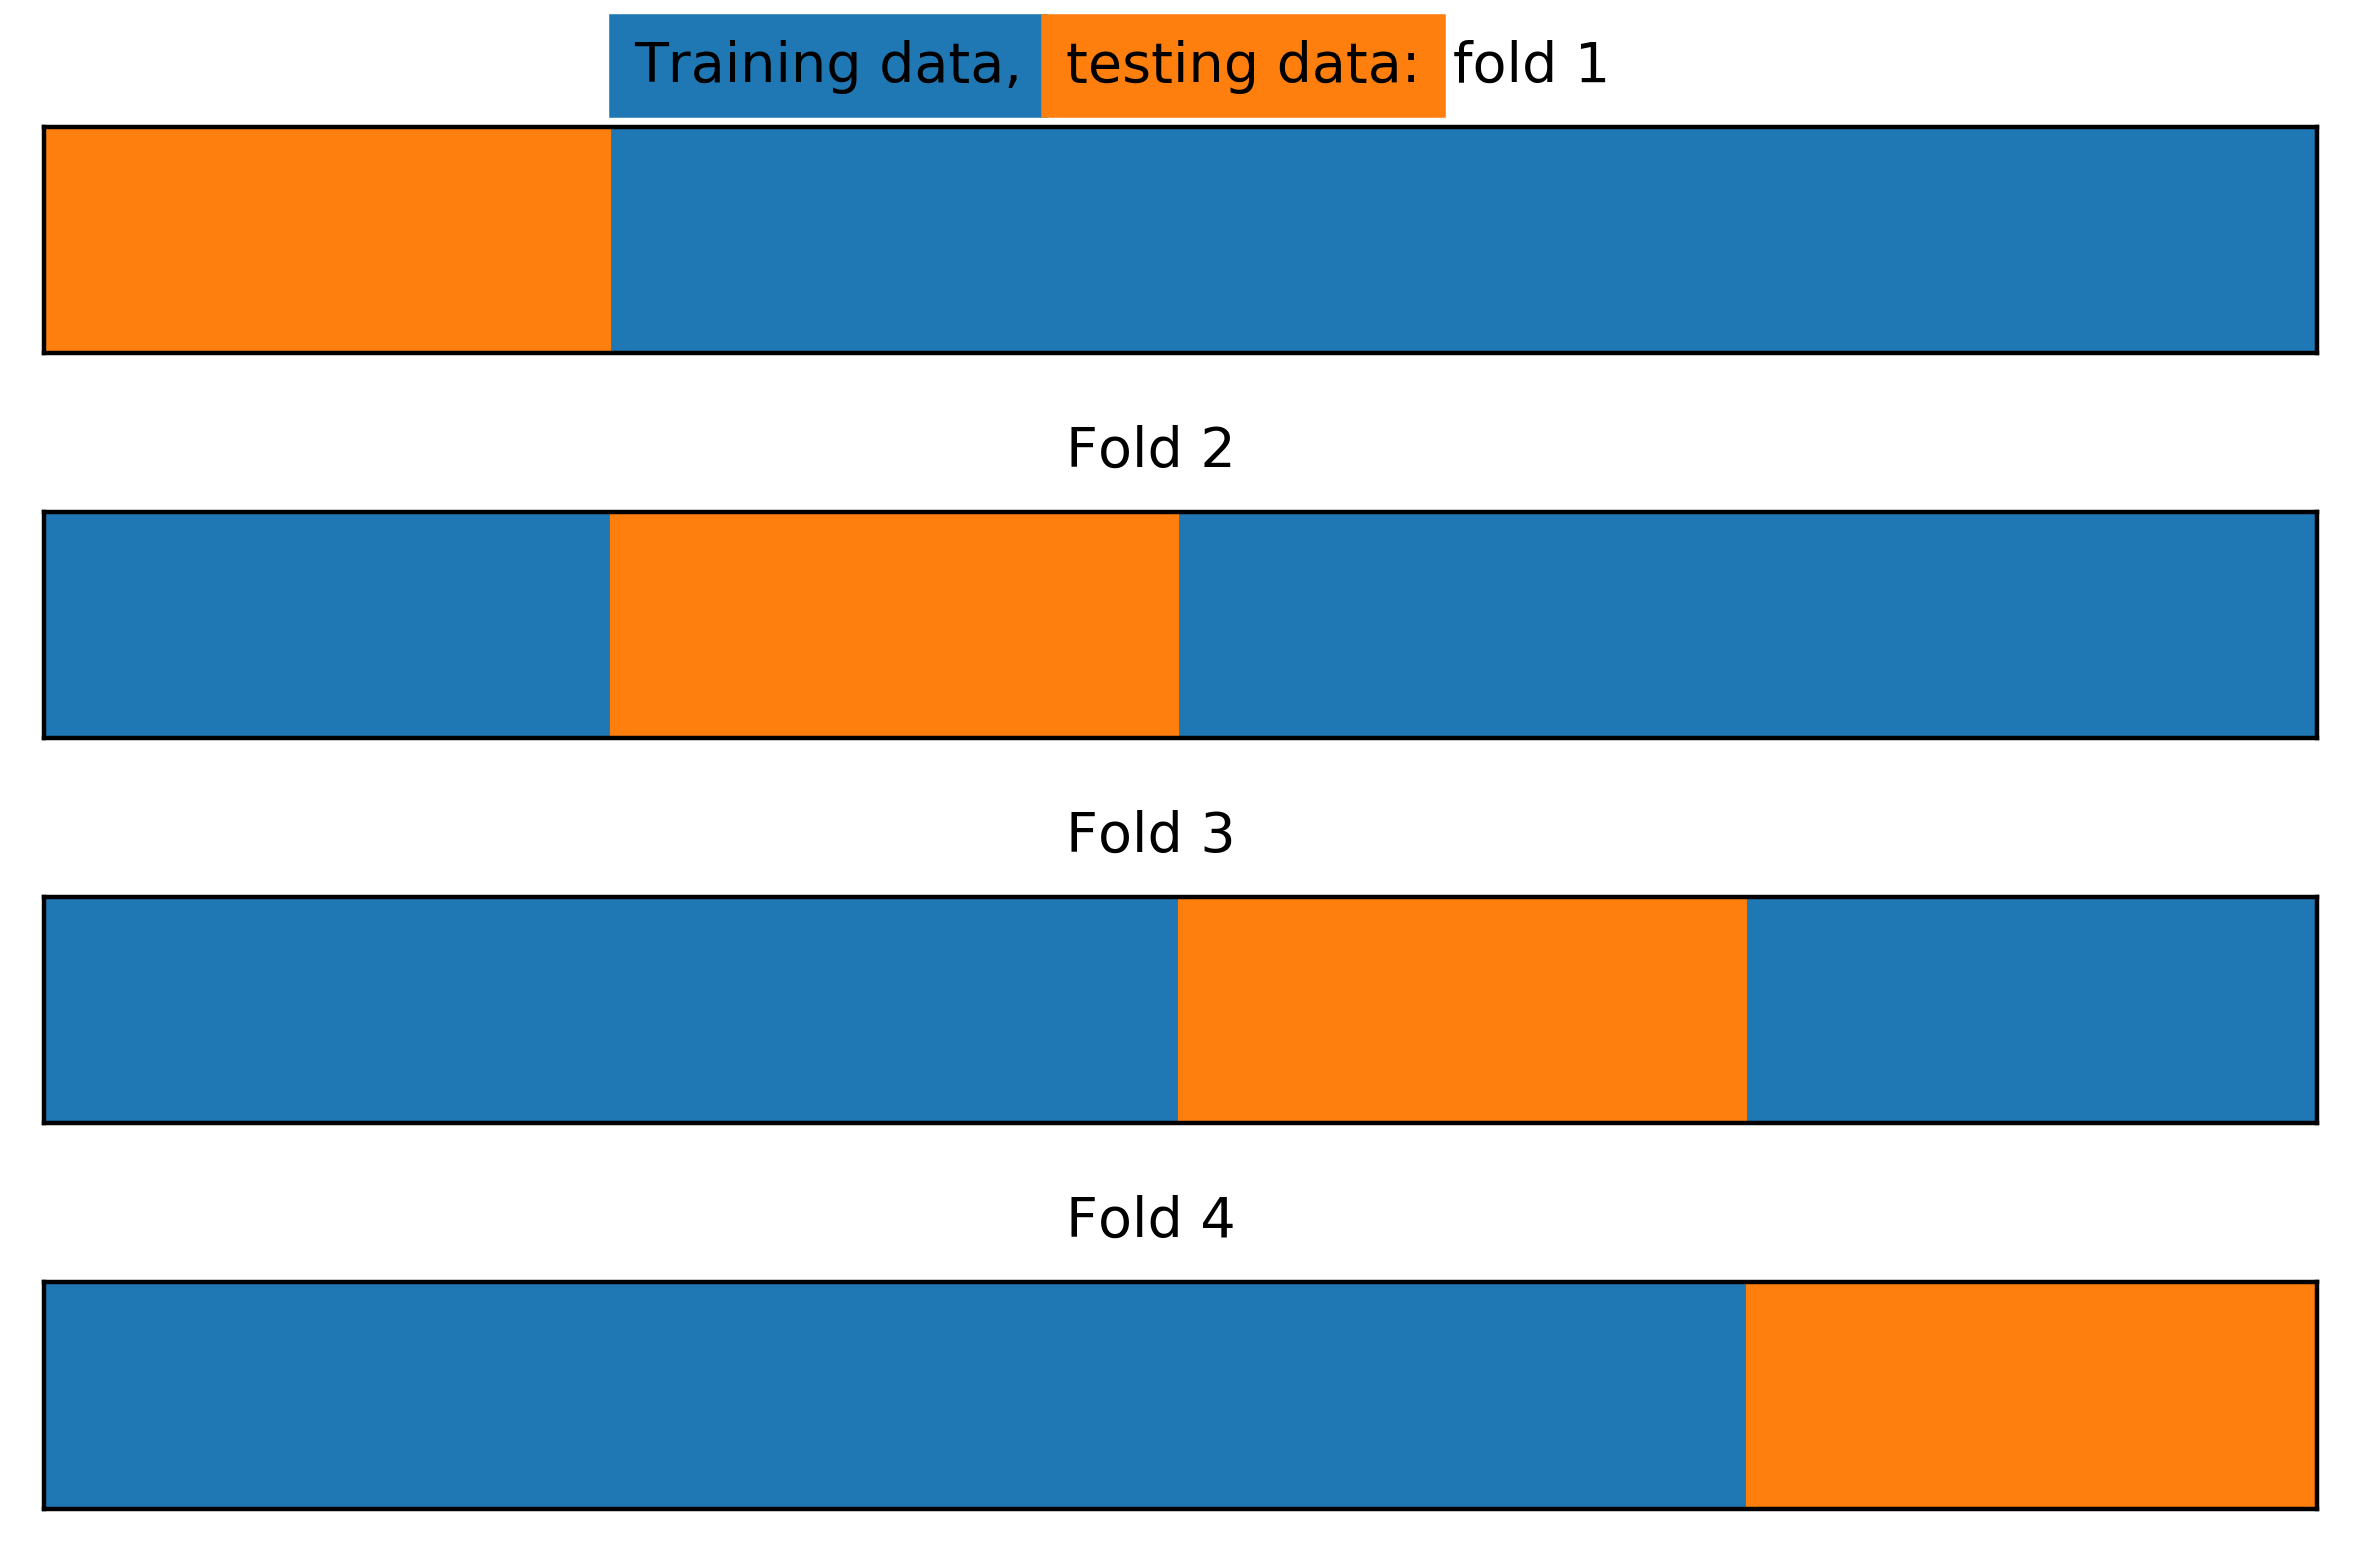

In [66]:
plot_kfolds(k_folds)

In [67]:
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=False, random_state=1)

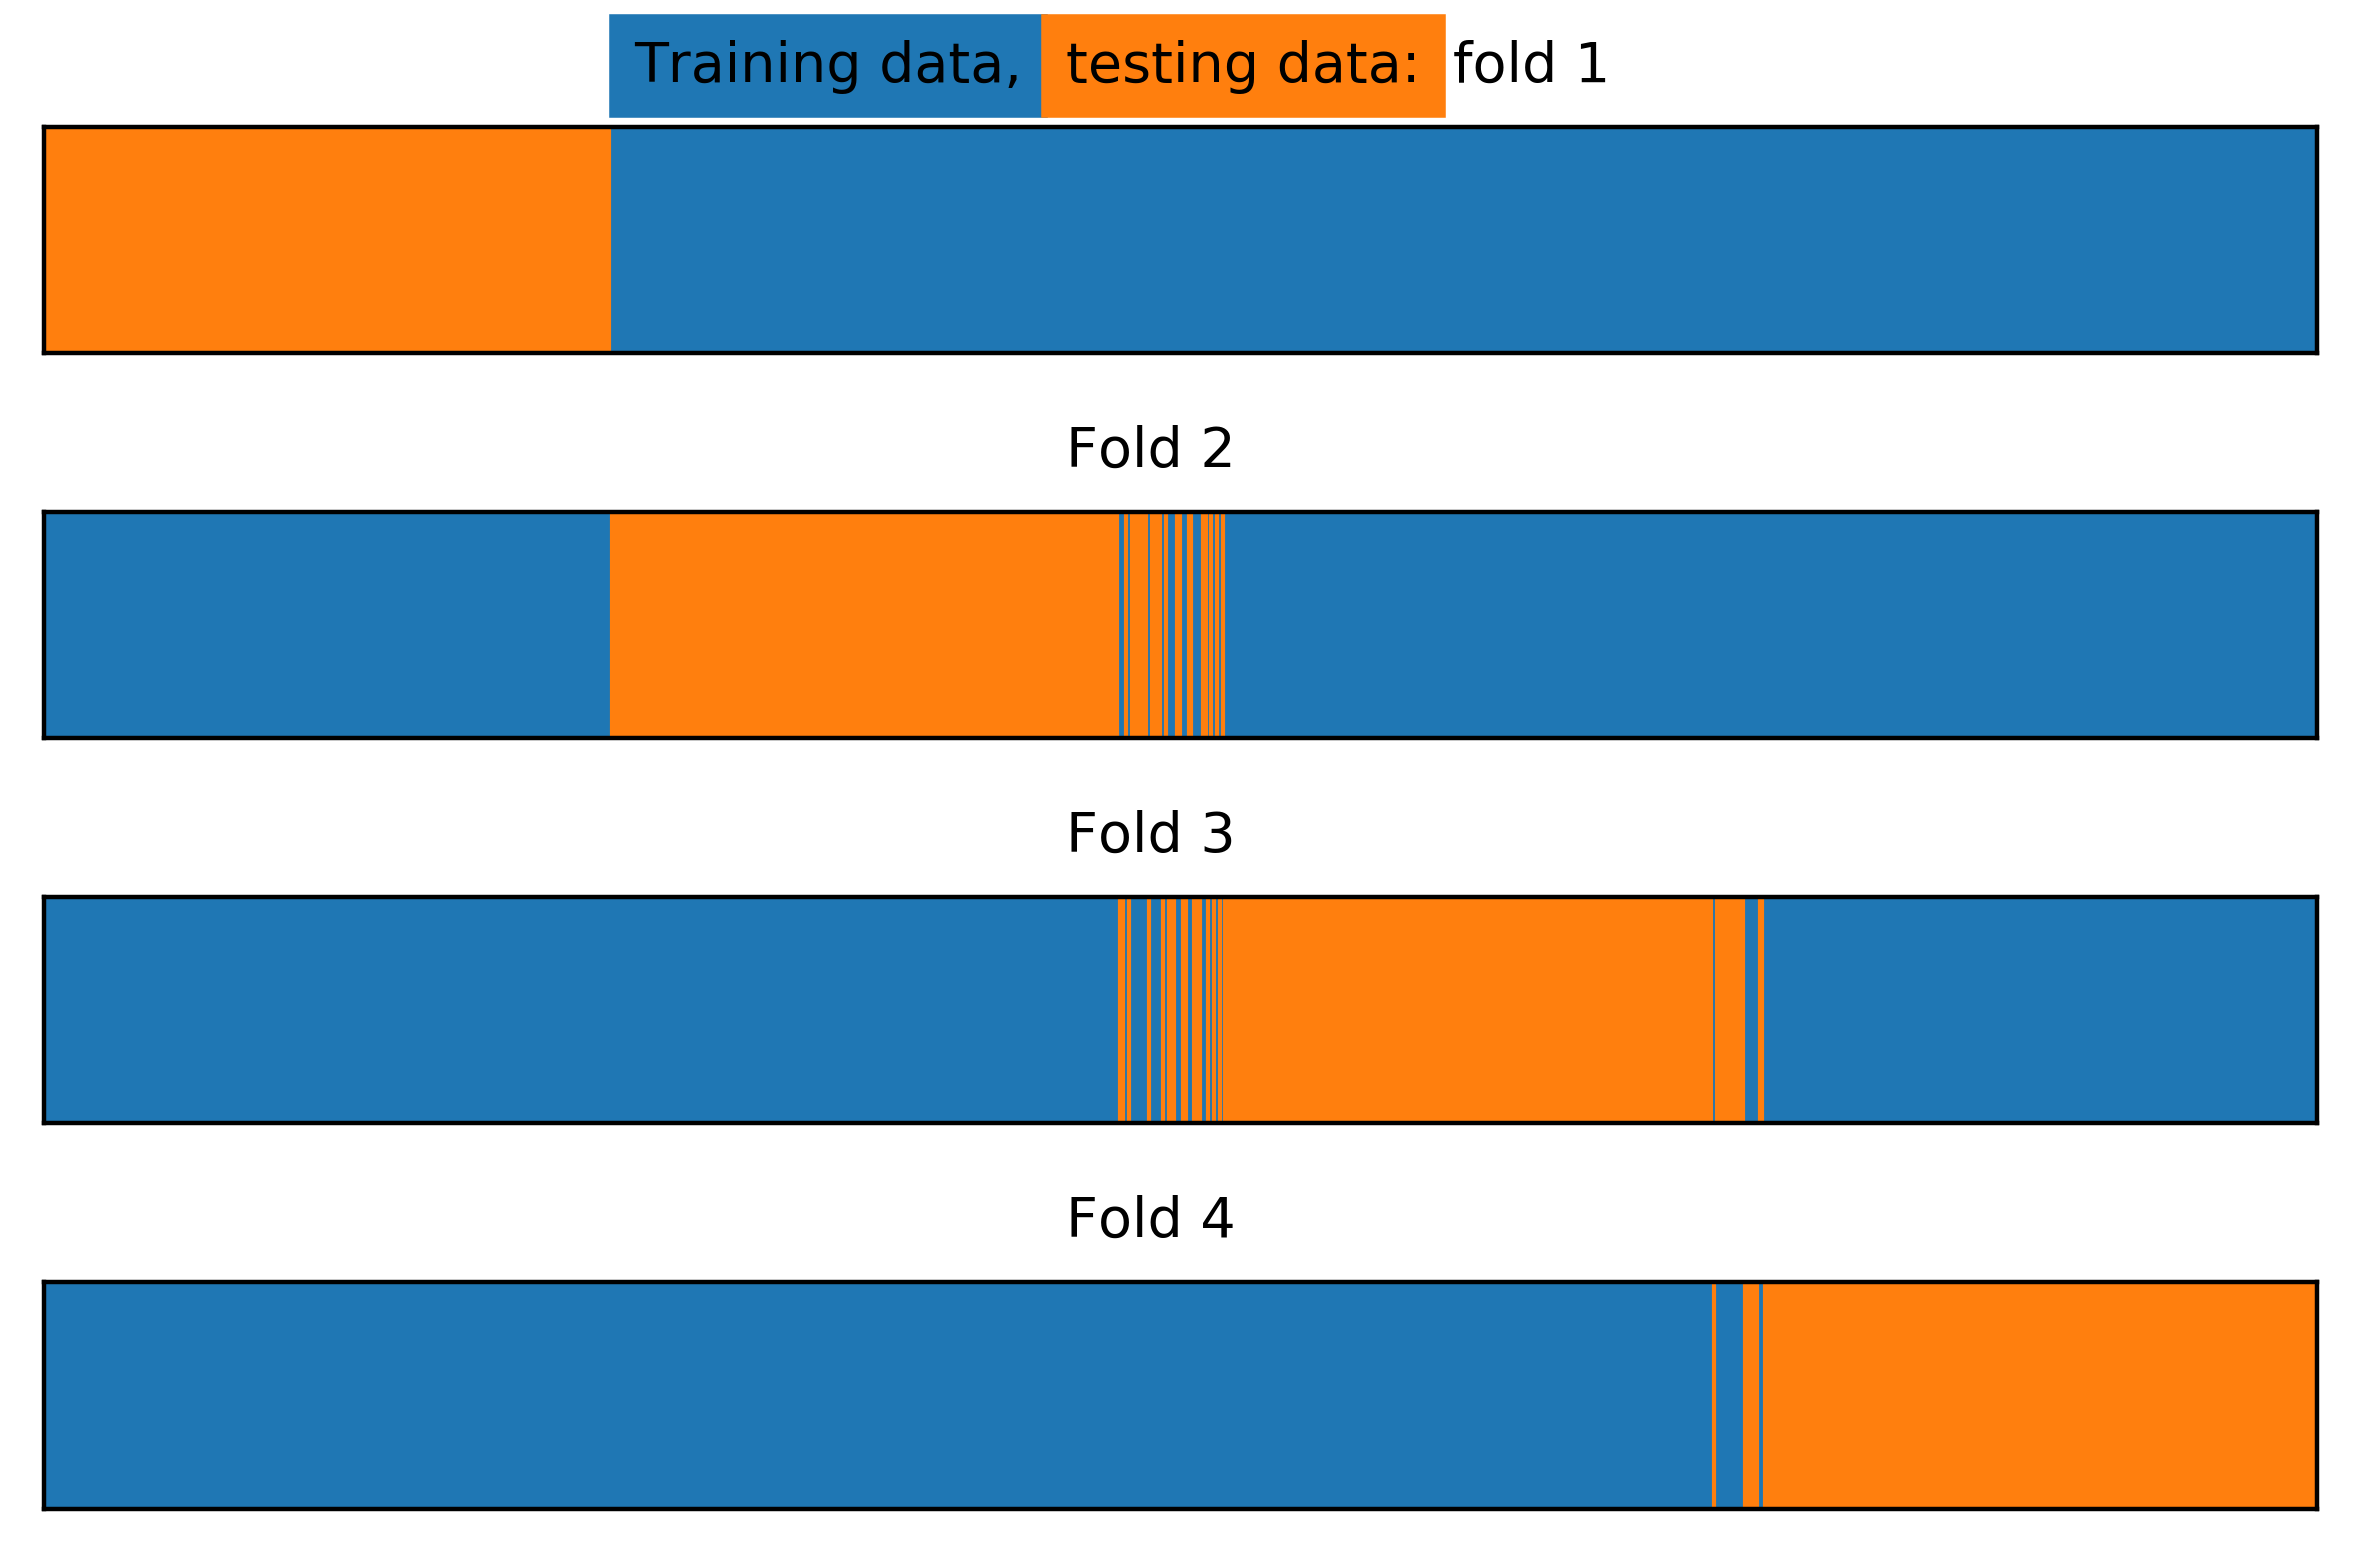

In [68]:
plot_kfolds(k_folds)

In [69]:
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)

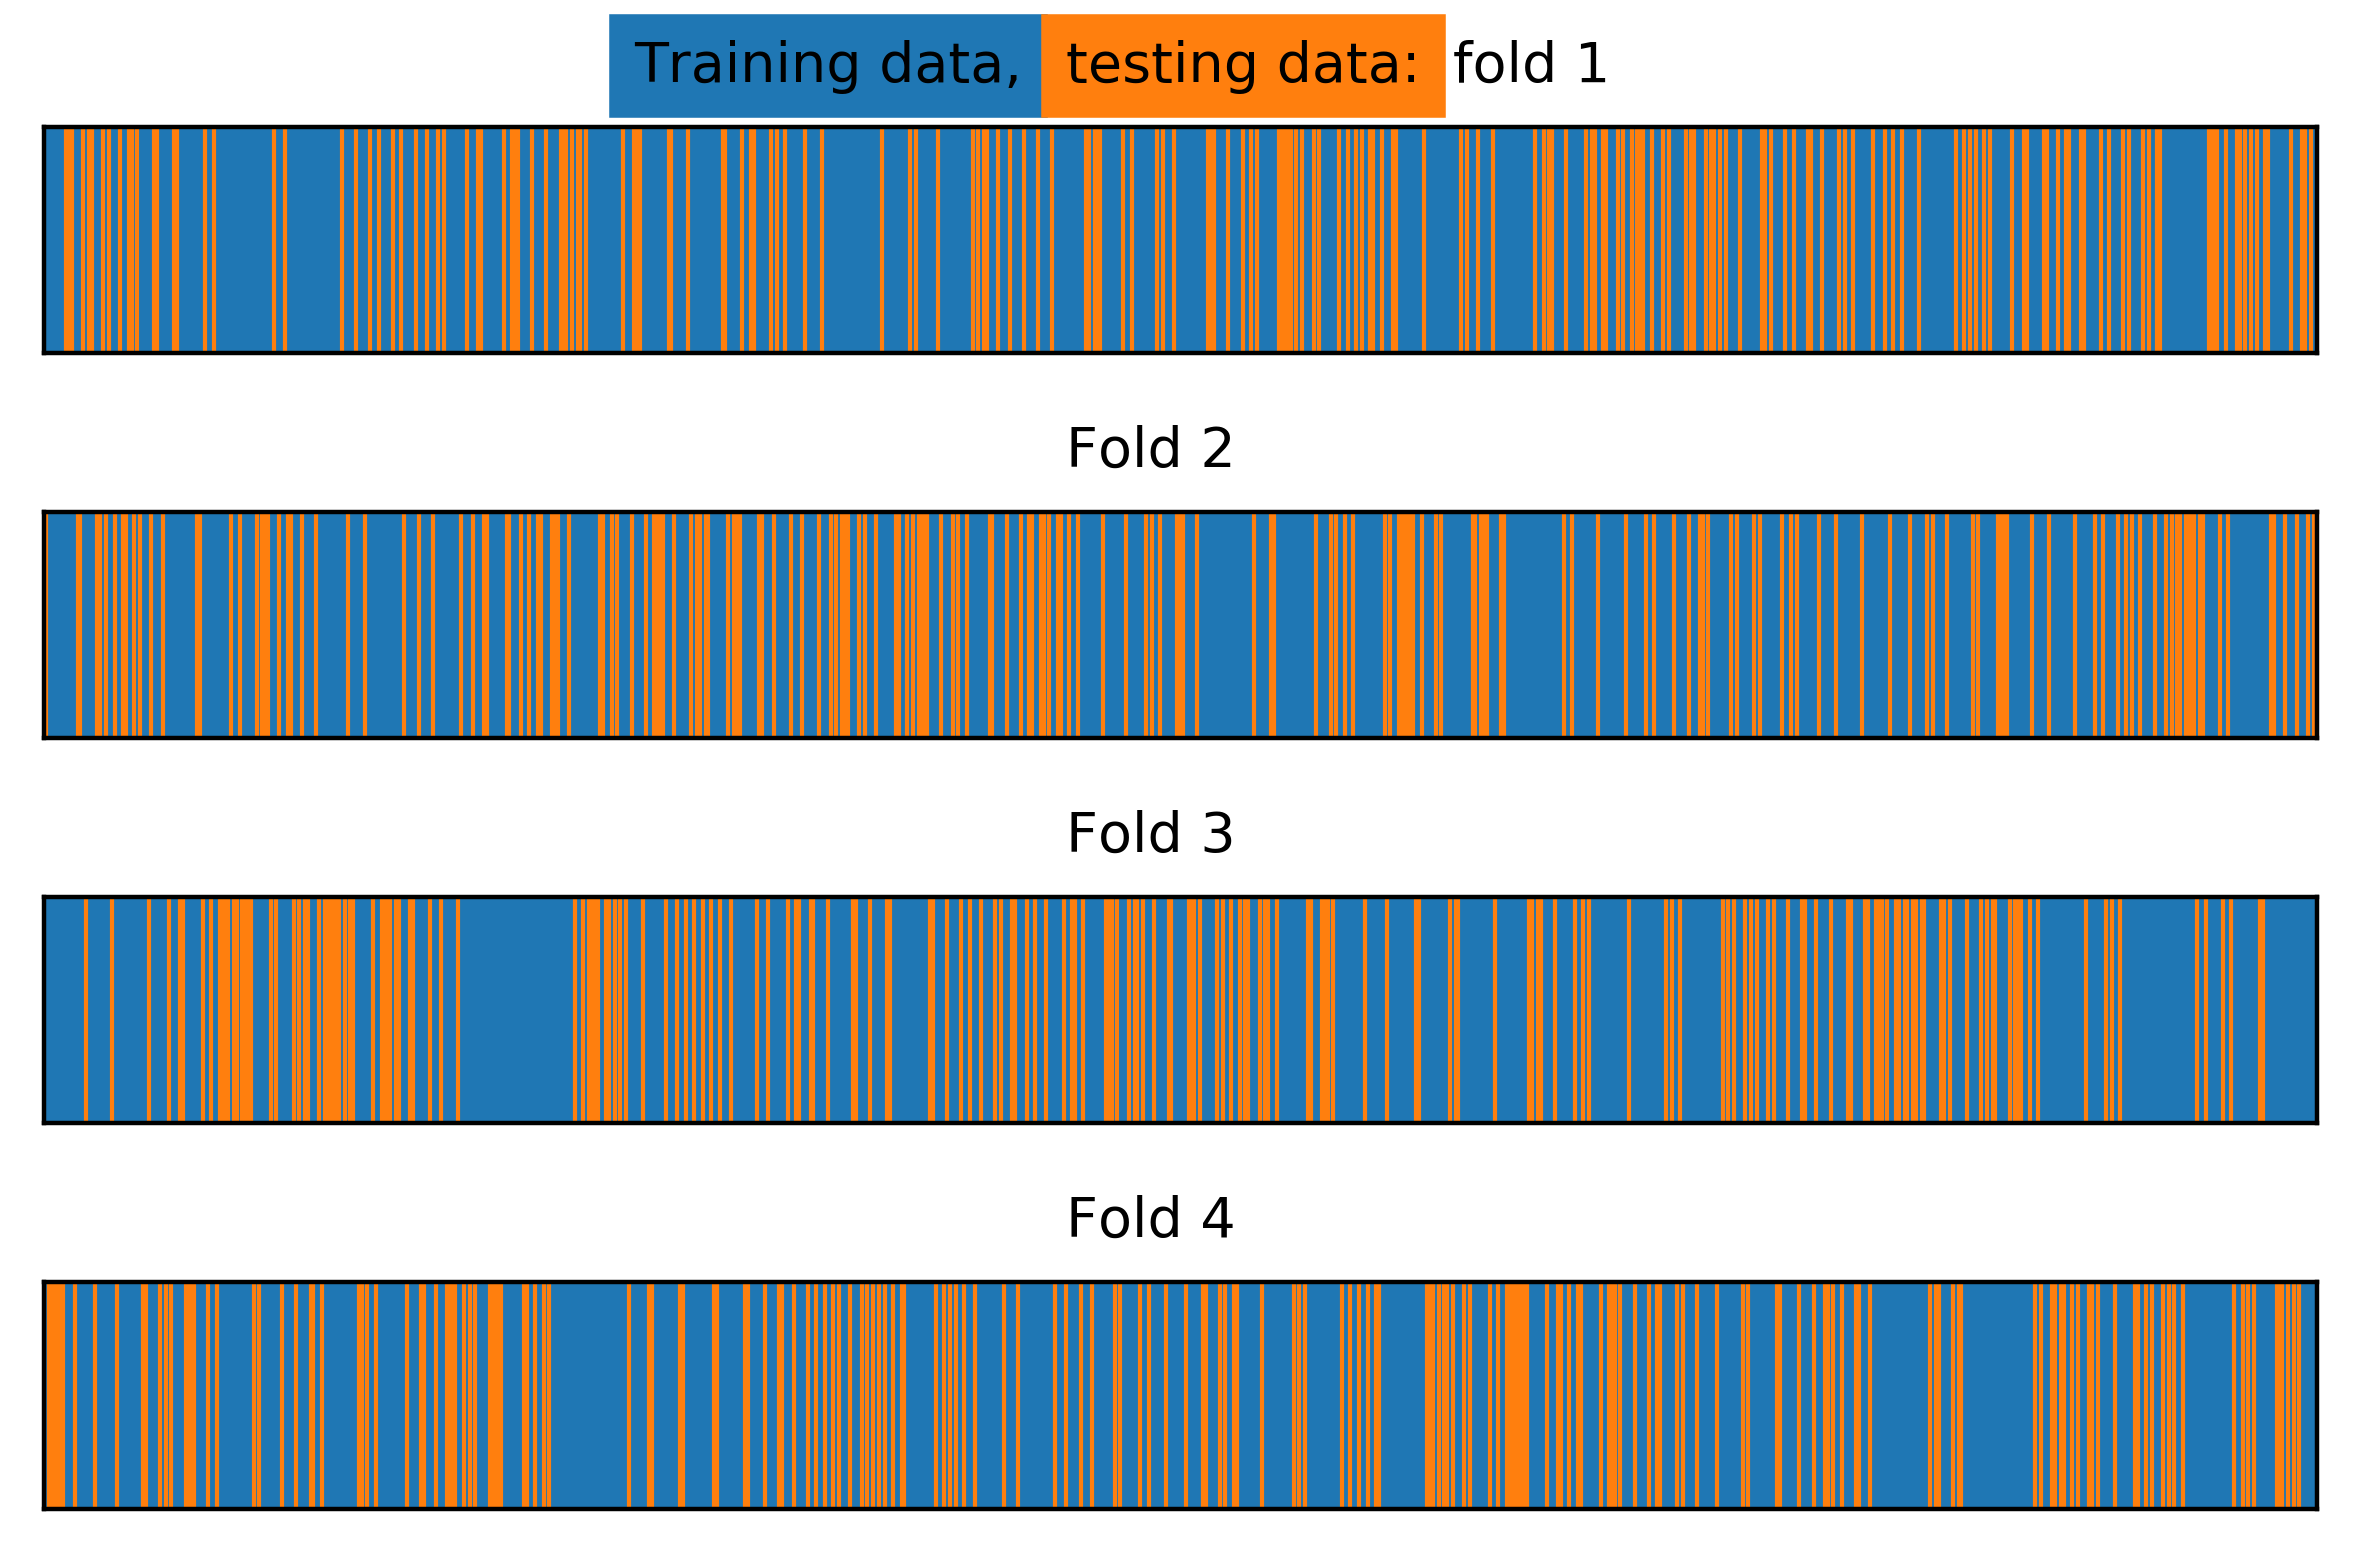

In [70]:
plot_kfolds(k_folds)

# Exercise 18: Reducing Overfitting on the Synthetic Data Classification Problem

In [71]:
C_val_exponents = np.linspace(3,-3,13)
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [72]:
C_vals = np.float(10)**C_val_exponents
C_vals

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [73]:
from sklearn.metrics import roc_curve

In [74]:
def cross_val_C_search(k_folds, C_vals, model, X, Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        model.C = C_vals[c_val_counter]
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            model.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(lr_syn.C))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [75]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search(k_folds, C_vals, lr_syn, X_syn_train, y_syn_train)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation scores for each fold')

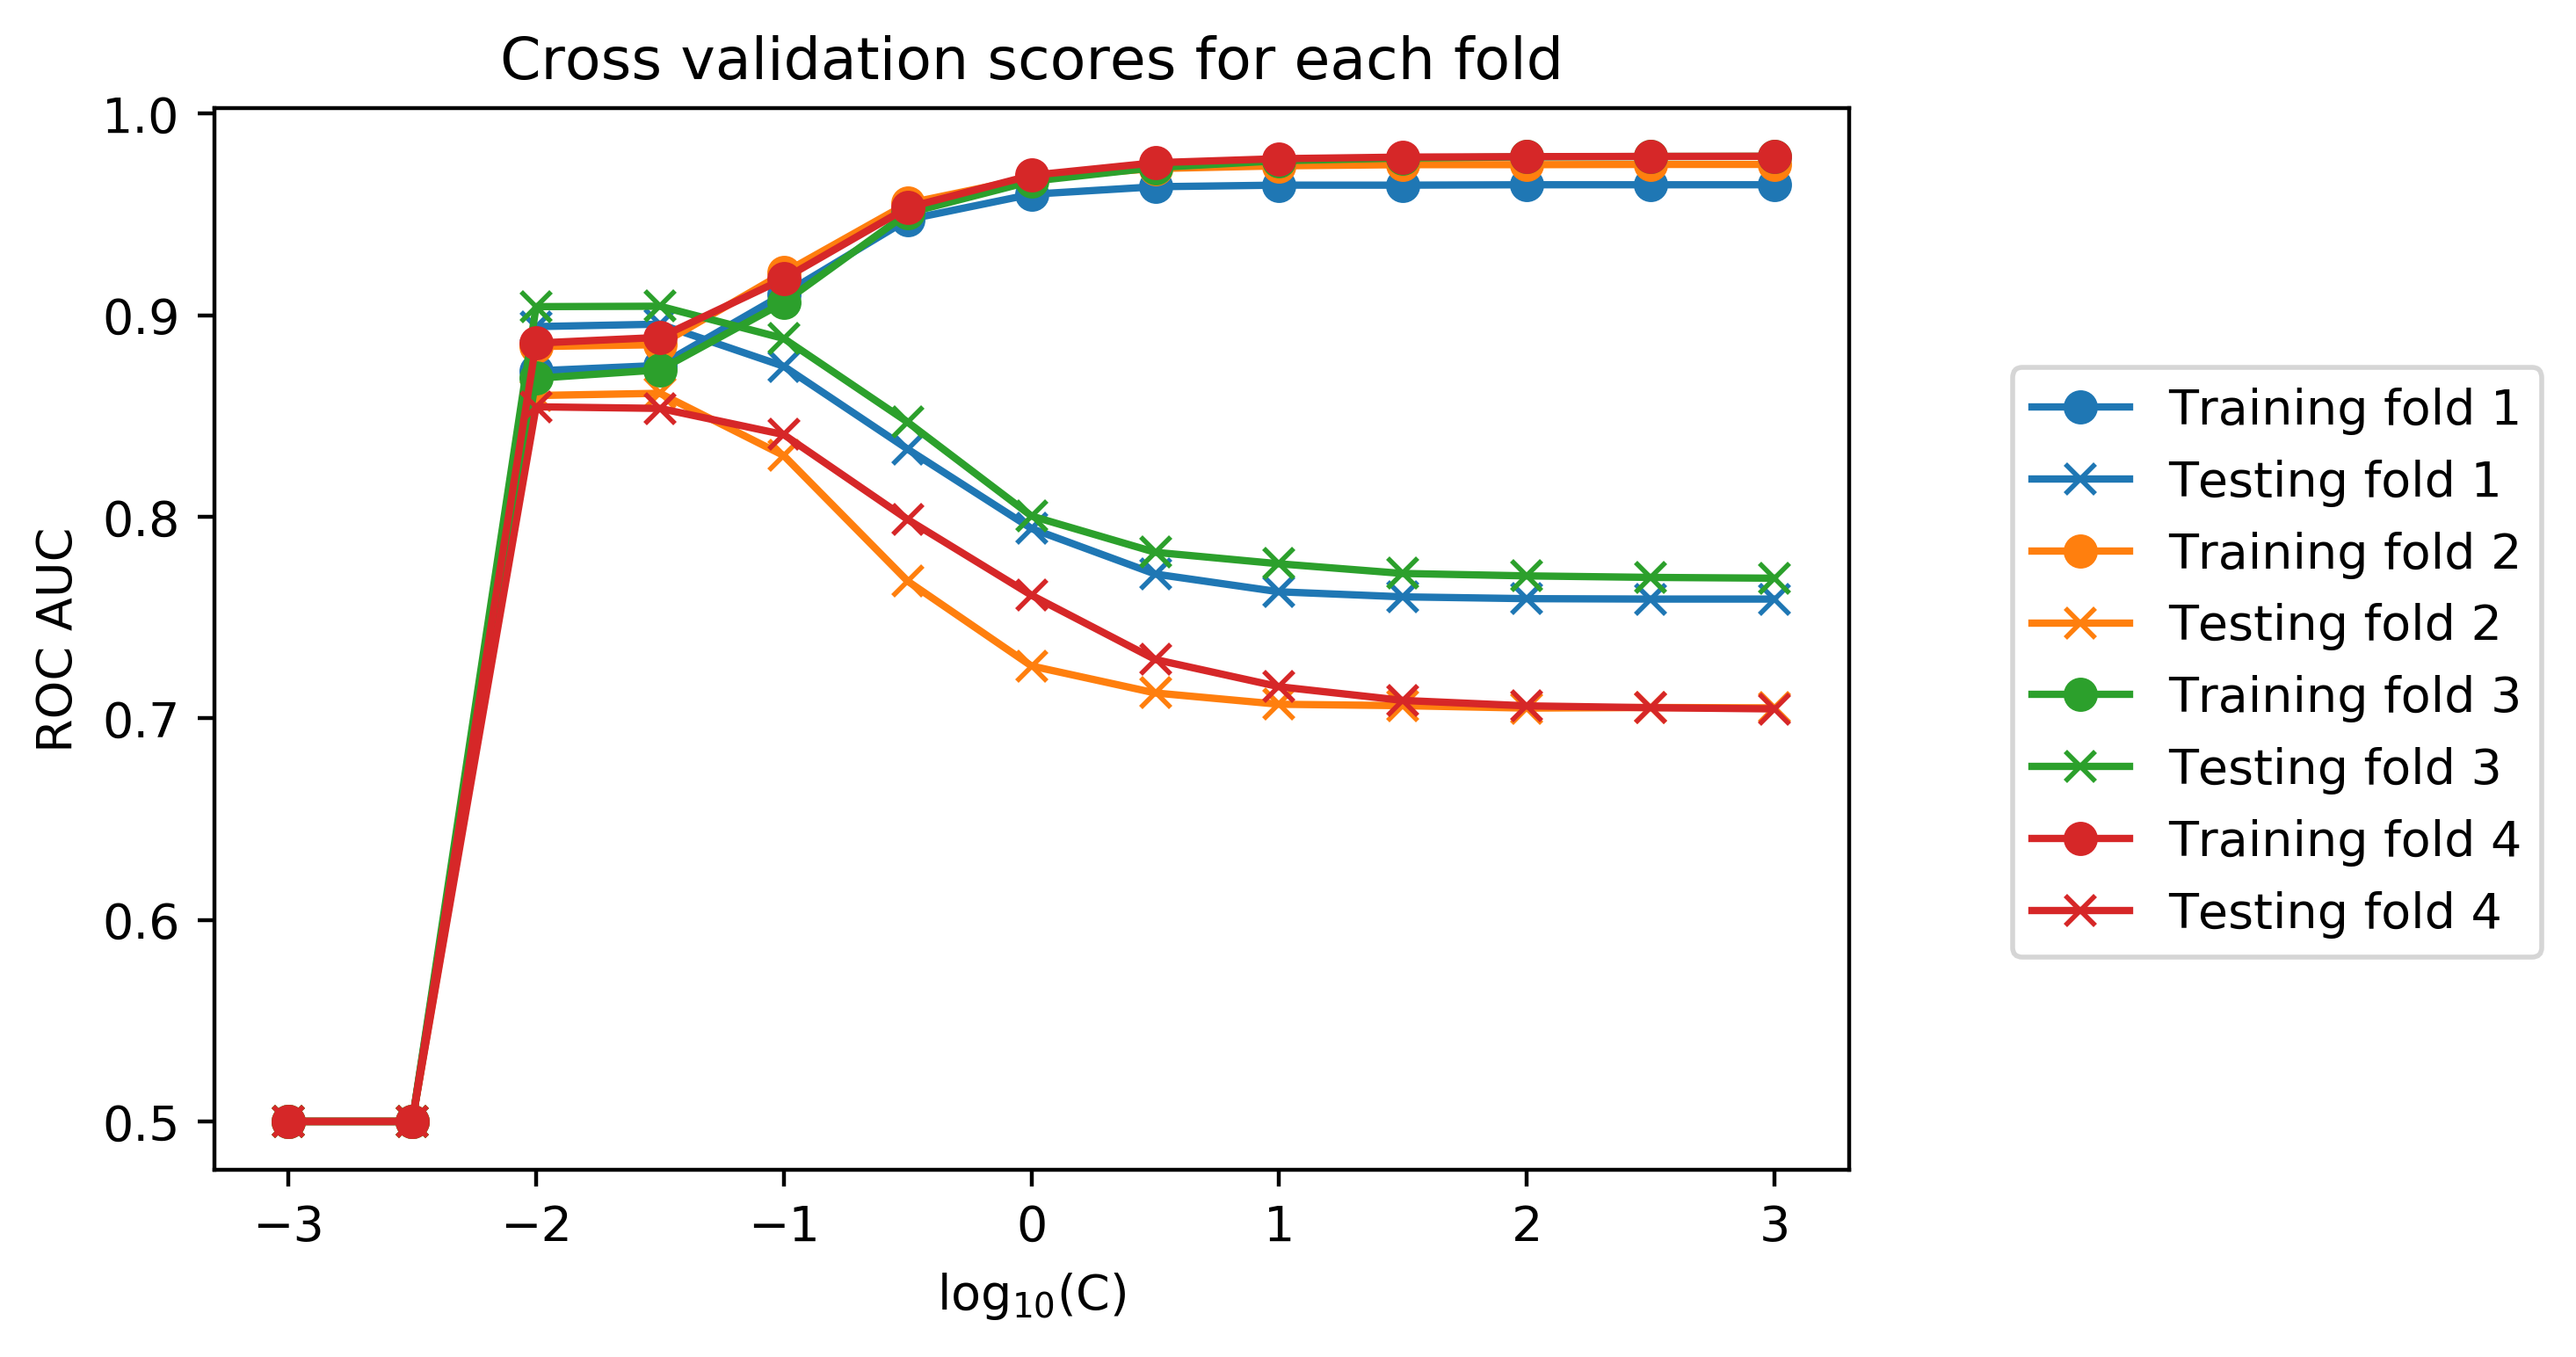

In [76]:
for this_fold in range(k_folds.n_splits):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o',
             color=cmap(this_fold), label='Training fold {}'.format(this_fold+1))
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x',
             color=cmap(this_fold), label='Testing fold {}'.format(this_fold+1))
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')

In [77]:
np.mean(cv_test_roc_auc,0)

array([0.7346625, 0.7349625, 0.73535  , 0.73685  , 0.74055  , 0.74895  ,
       0.770425 , 0.81185  , 0.8586   , 0.8788   , 0.878375 , 0.5      ,
       0.5      ])

In [78]:
np.mean(cv_train_roc_auc,0)

array([0.97436389, 0.97431389, 0.97421389, 0.97396111, 0.97328611,
       0.97140278, 0.9661    , 0.9518    , 0.91403056, 0.88062778,
       0.87796944, 0.5       , 0.5       ])

In [79]:
cv_train_roc_auc.shape

(4, 13)

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

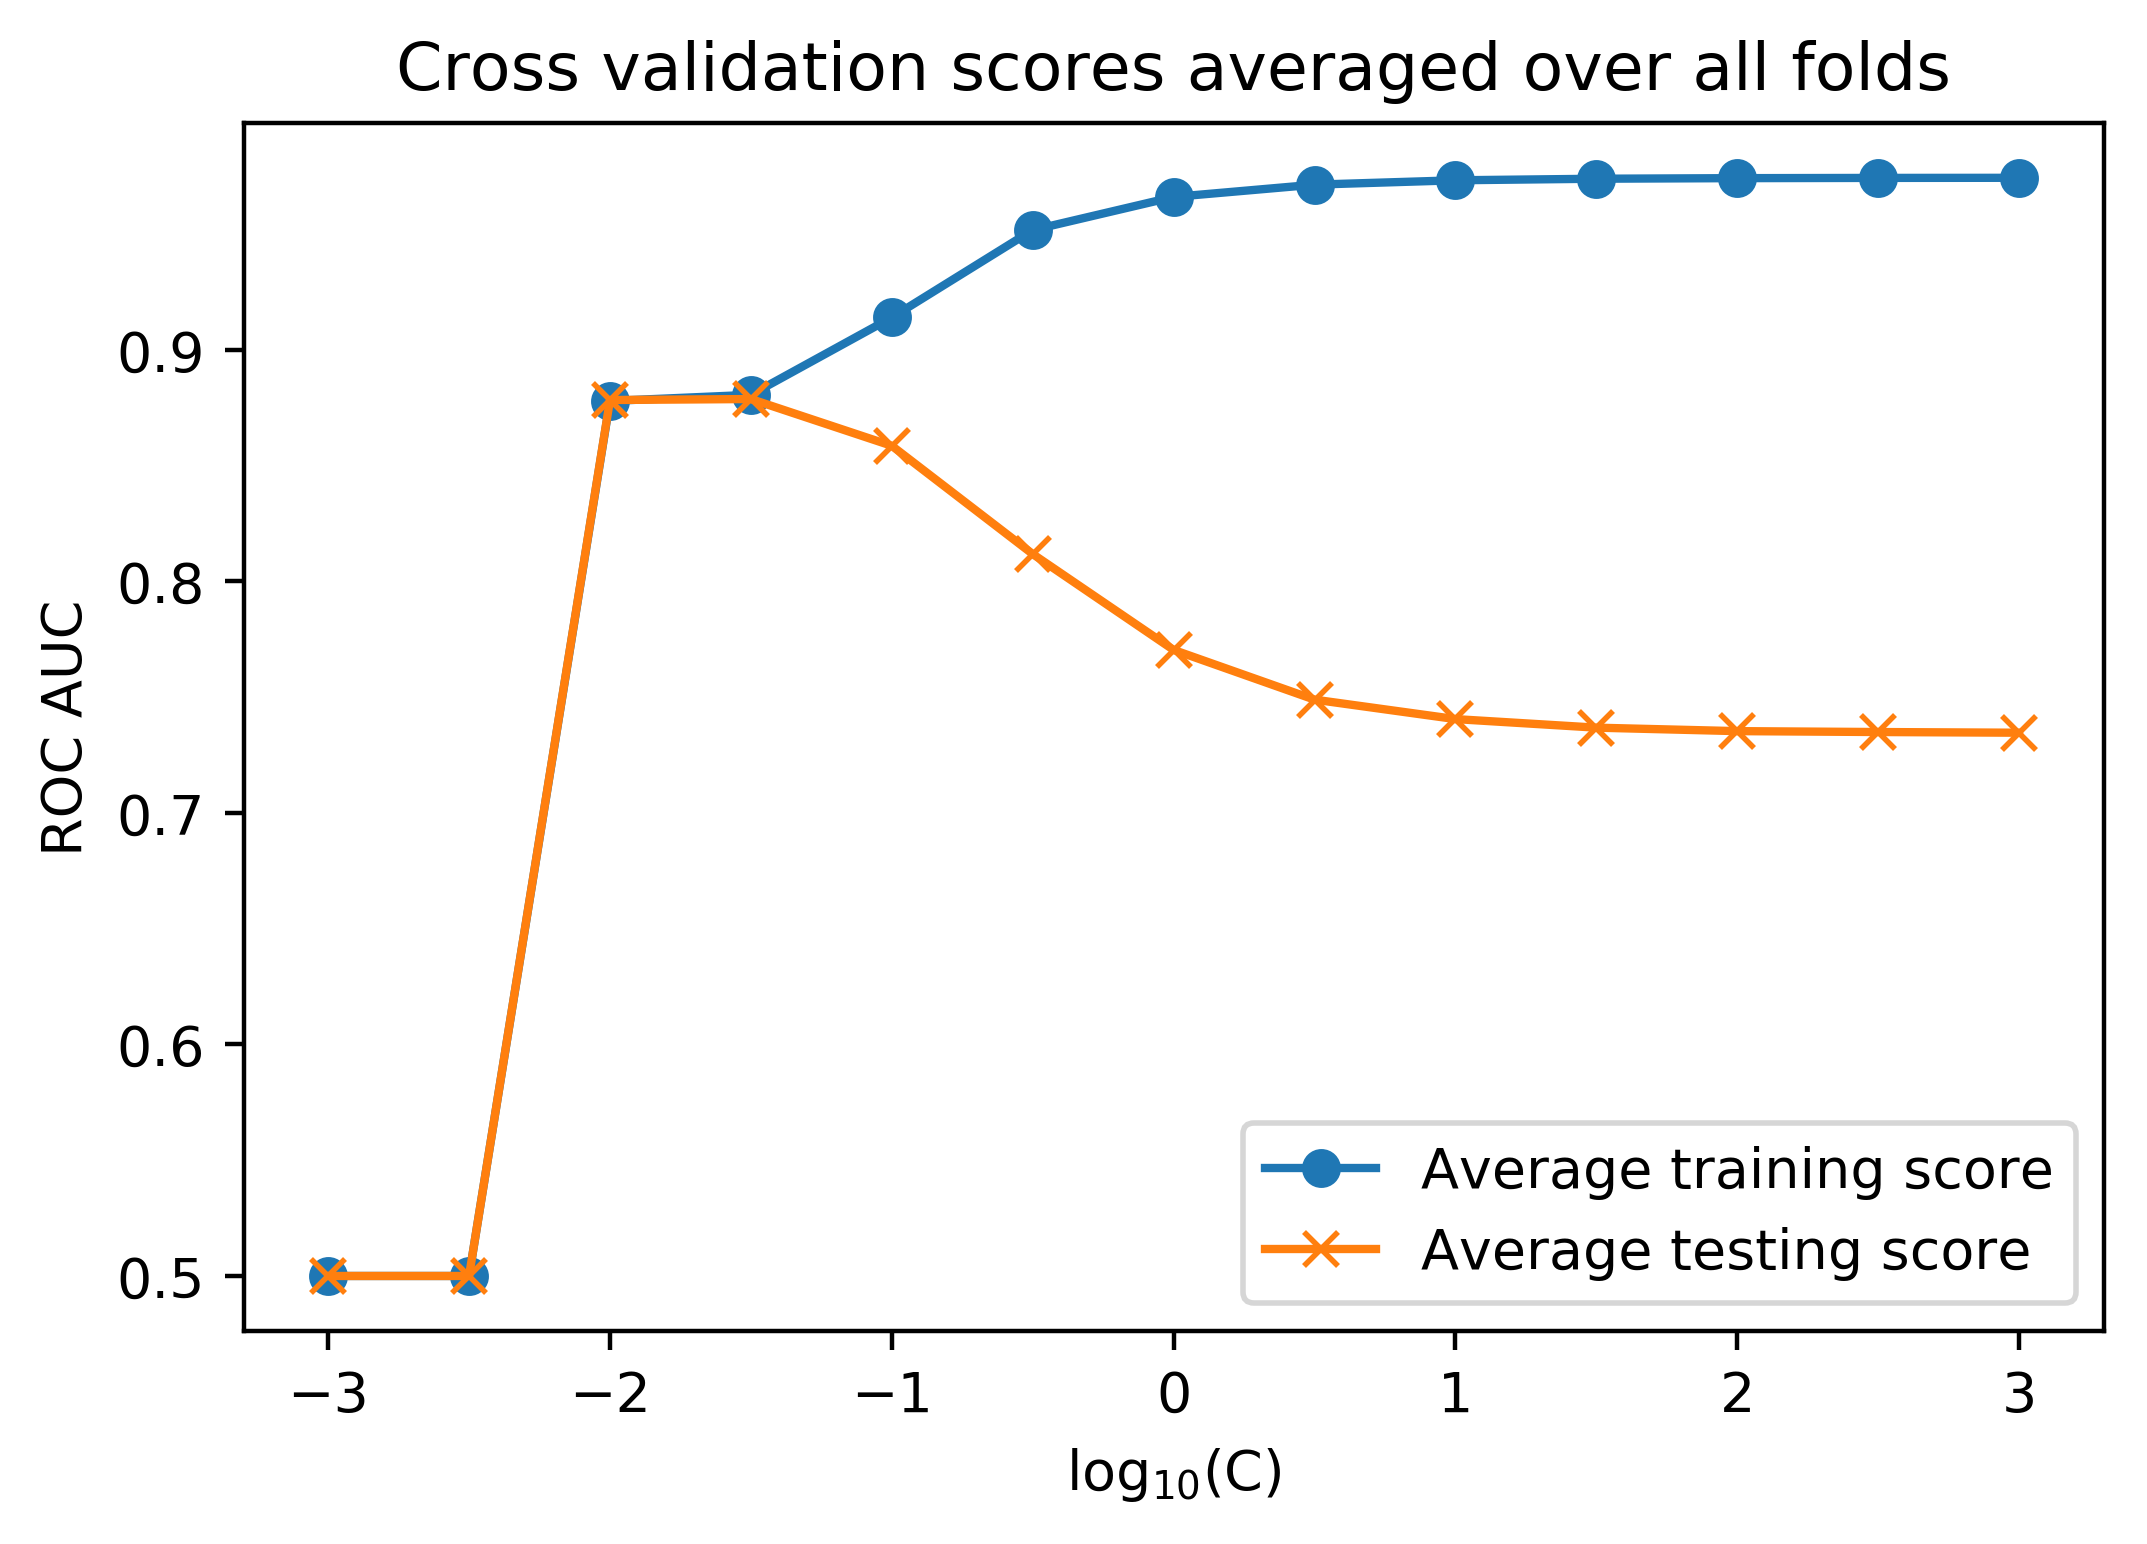

In [80]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

The FPRs, TPRs, and thresholds for each fold, for each C value, are contained in the list of lists as tuples:

In [81]:
type(cv_test_roc[9][0])

tuple

In [82]:
#Some FPRs
cv_test_roc[9][0][0]

array([0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04,
       0.05, 0.05, 0.06, 0.06, 0.07, 0.07, 0.08, 0.08, 0.11, 0.11, 0.13,
       0.13, 0.14, 0.14, 0.15, 0.15, 0.17, 0.17, 0.19, 0.19, 0.2 , 0.2 ,
       0.21, 0.21, 0.22, 0.22, 0.23, 0.23, 0.25, 0.25, 0.26, 0.26, 0.27,
       0.27, 0.29, 0.29, 0.32, 0.32, 0.33, 0.33, 0.35, 0.35, 0.37, 0.37,
       0.41, 0.41, 0.44, 0.44, 0.47, 0.47, 0.48, 0.48, 0.5 , 0.5 , 0.51,
       0.51, 0.53, 0.53, 0.54, 0.54, 0.56, 0.56, 0.59, 0.59, 0.61, 0.61,
       0.62, 0.62, 0.65, 0.65, 0.67, 0.67, 0.69, 0.69, 0.7 , 0.7 , 0.73,
       0.73, 0.74, 0.74, 0.87, 0.87, 0.9 , 0.9 , 1.  ])

In [83]:
best_C_val_bool = C_val_exponents == -1.5
best_C_val_bool.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [84]:
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int))
best_C_val_ix[0][0]

9

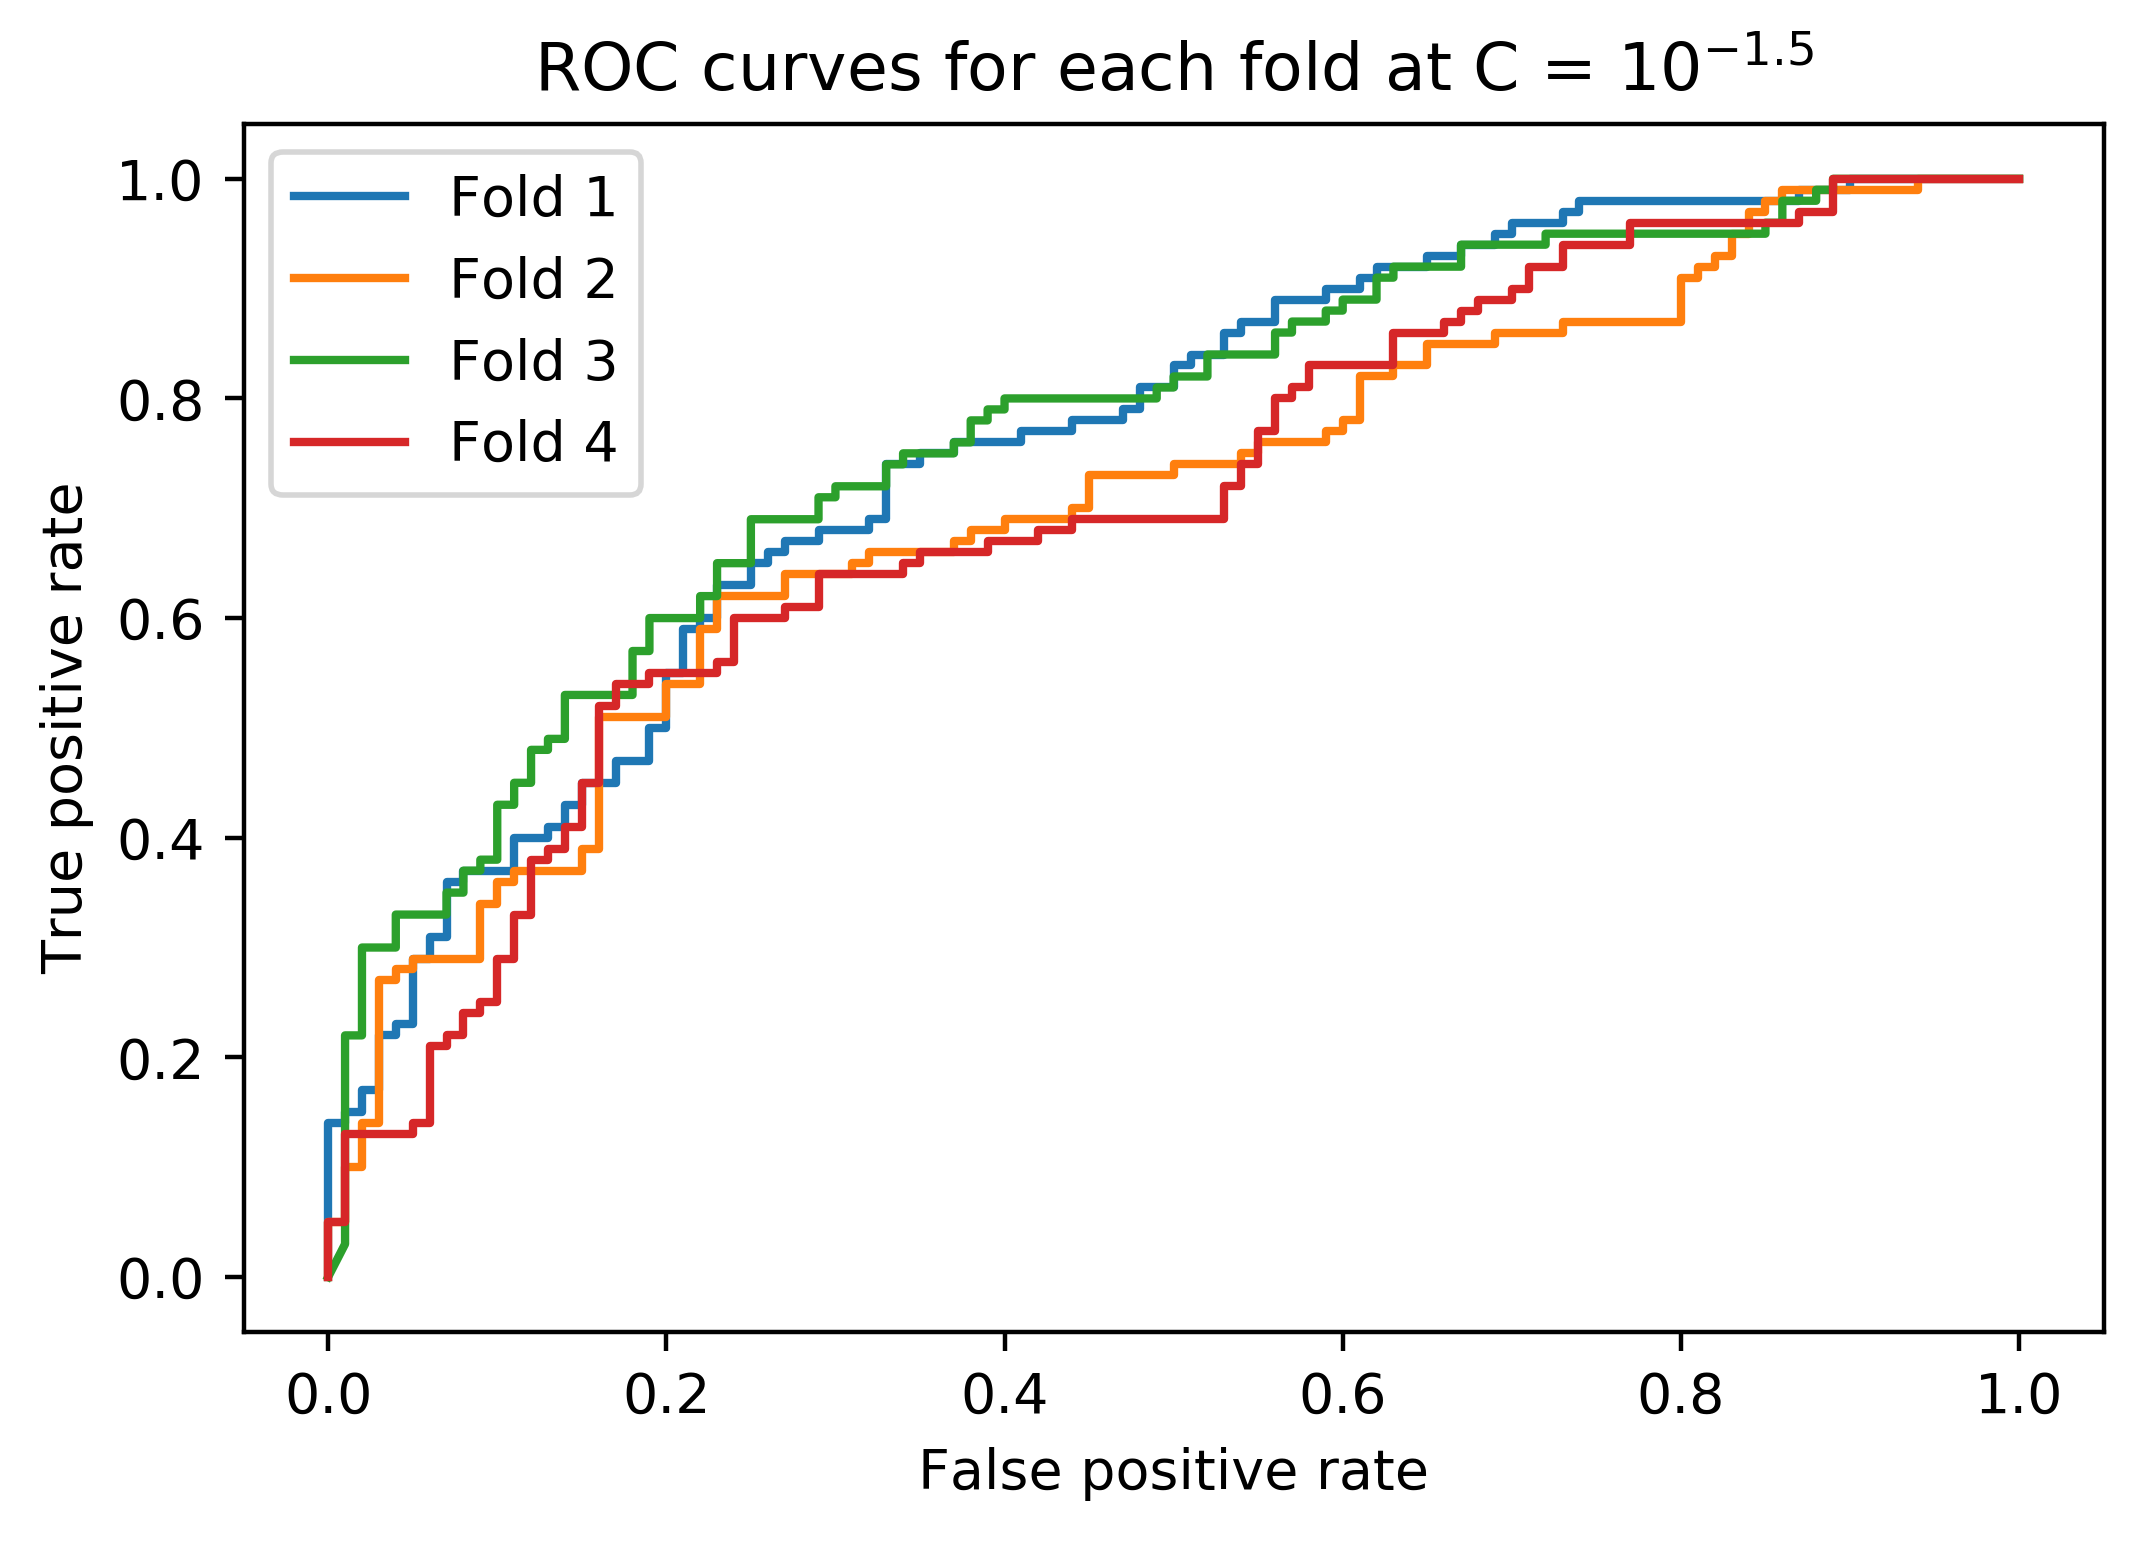

In [85]:
for this_fold in range(k_folds.n_splits):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label='Fold {}'.format(this_fold+1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend()

Train on all training data with best C value

In [86]:
lr_syn.C = 10**(-1.5)

In [87]:
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=0.03162277660168379, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [88]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)

In [89]:
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.8802812499999999

In [90]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)

In [91]:
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8847884788478848

See how many coefficients did not get set to 0

In [92]:
sum((lr_syn.coef_ != 0)[0])

2

In [93]:
lr_syn.intercept_

array([0.])

# Activity 4: Cross-Validation and Feature Engineering with the Case Study Data

Subset out the features for the case study data

In [94]:
features = features_response[:-1]
features

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [95]:
len(features)

17

In [96]:
X = df[features].values

In [97]:
X.shape

(26664, 17)

Make a train/test split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [99]:
print(X_train.shape)
print(X_test.shape)

(21331, 17)
(5333, 17)


In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
min_max_sc = MinMaxScaler()

In [102]:
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)

In [103]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
from sklearn.pipeline import Pipeline

In [105]:
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr)])

In [106]:
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('model',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=1000, multi_class='warn',
             n_jobs=None, penalty='l1', random_state=None, solver='saga',
             tol=0.0001, verbose=0, warm_start=False))],
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=None, solver='saga',
           tol=0.0001, verbose=0, warm_start=False),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__max_iter': 1000,
 'model__multi_class': 'warn',
 'model__n_jobs': None,
 'model__pen

In [107]:
scale_lr_pipeline.get_params()['model__C']

1.0

In [108]:
scale_lr_pipeline.set_params(model__C = 2)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))])

In [109]:
C_val_exponents = np.linspace(2,-3,6)
C_val_exponents

array([ 2.,  1.,  0., -1., -2., -3.])

In [110]:
C_vals = np.float(10)**C_val_exponents
C_vals

array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [111]:
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X, Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [112]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarni

Done with C = 100.0


C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarni

Done with C = 10.0


C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarni

Done with C = 1.0


C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarni

Done with C = 0.1


C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarni

Done with C = 0.01


C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Done with C = 0.001


C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0.5, 1.0, 'Cross validation on Case Study problem')

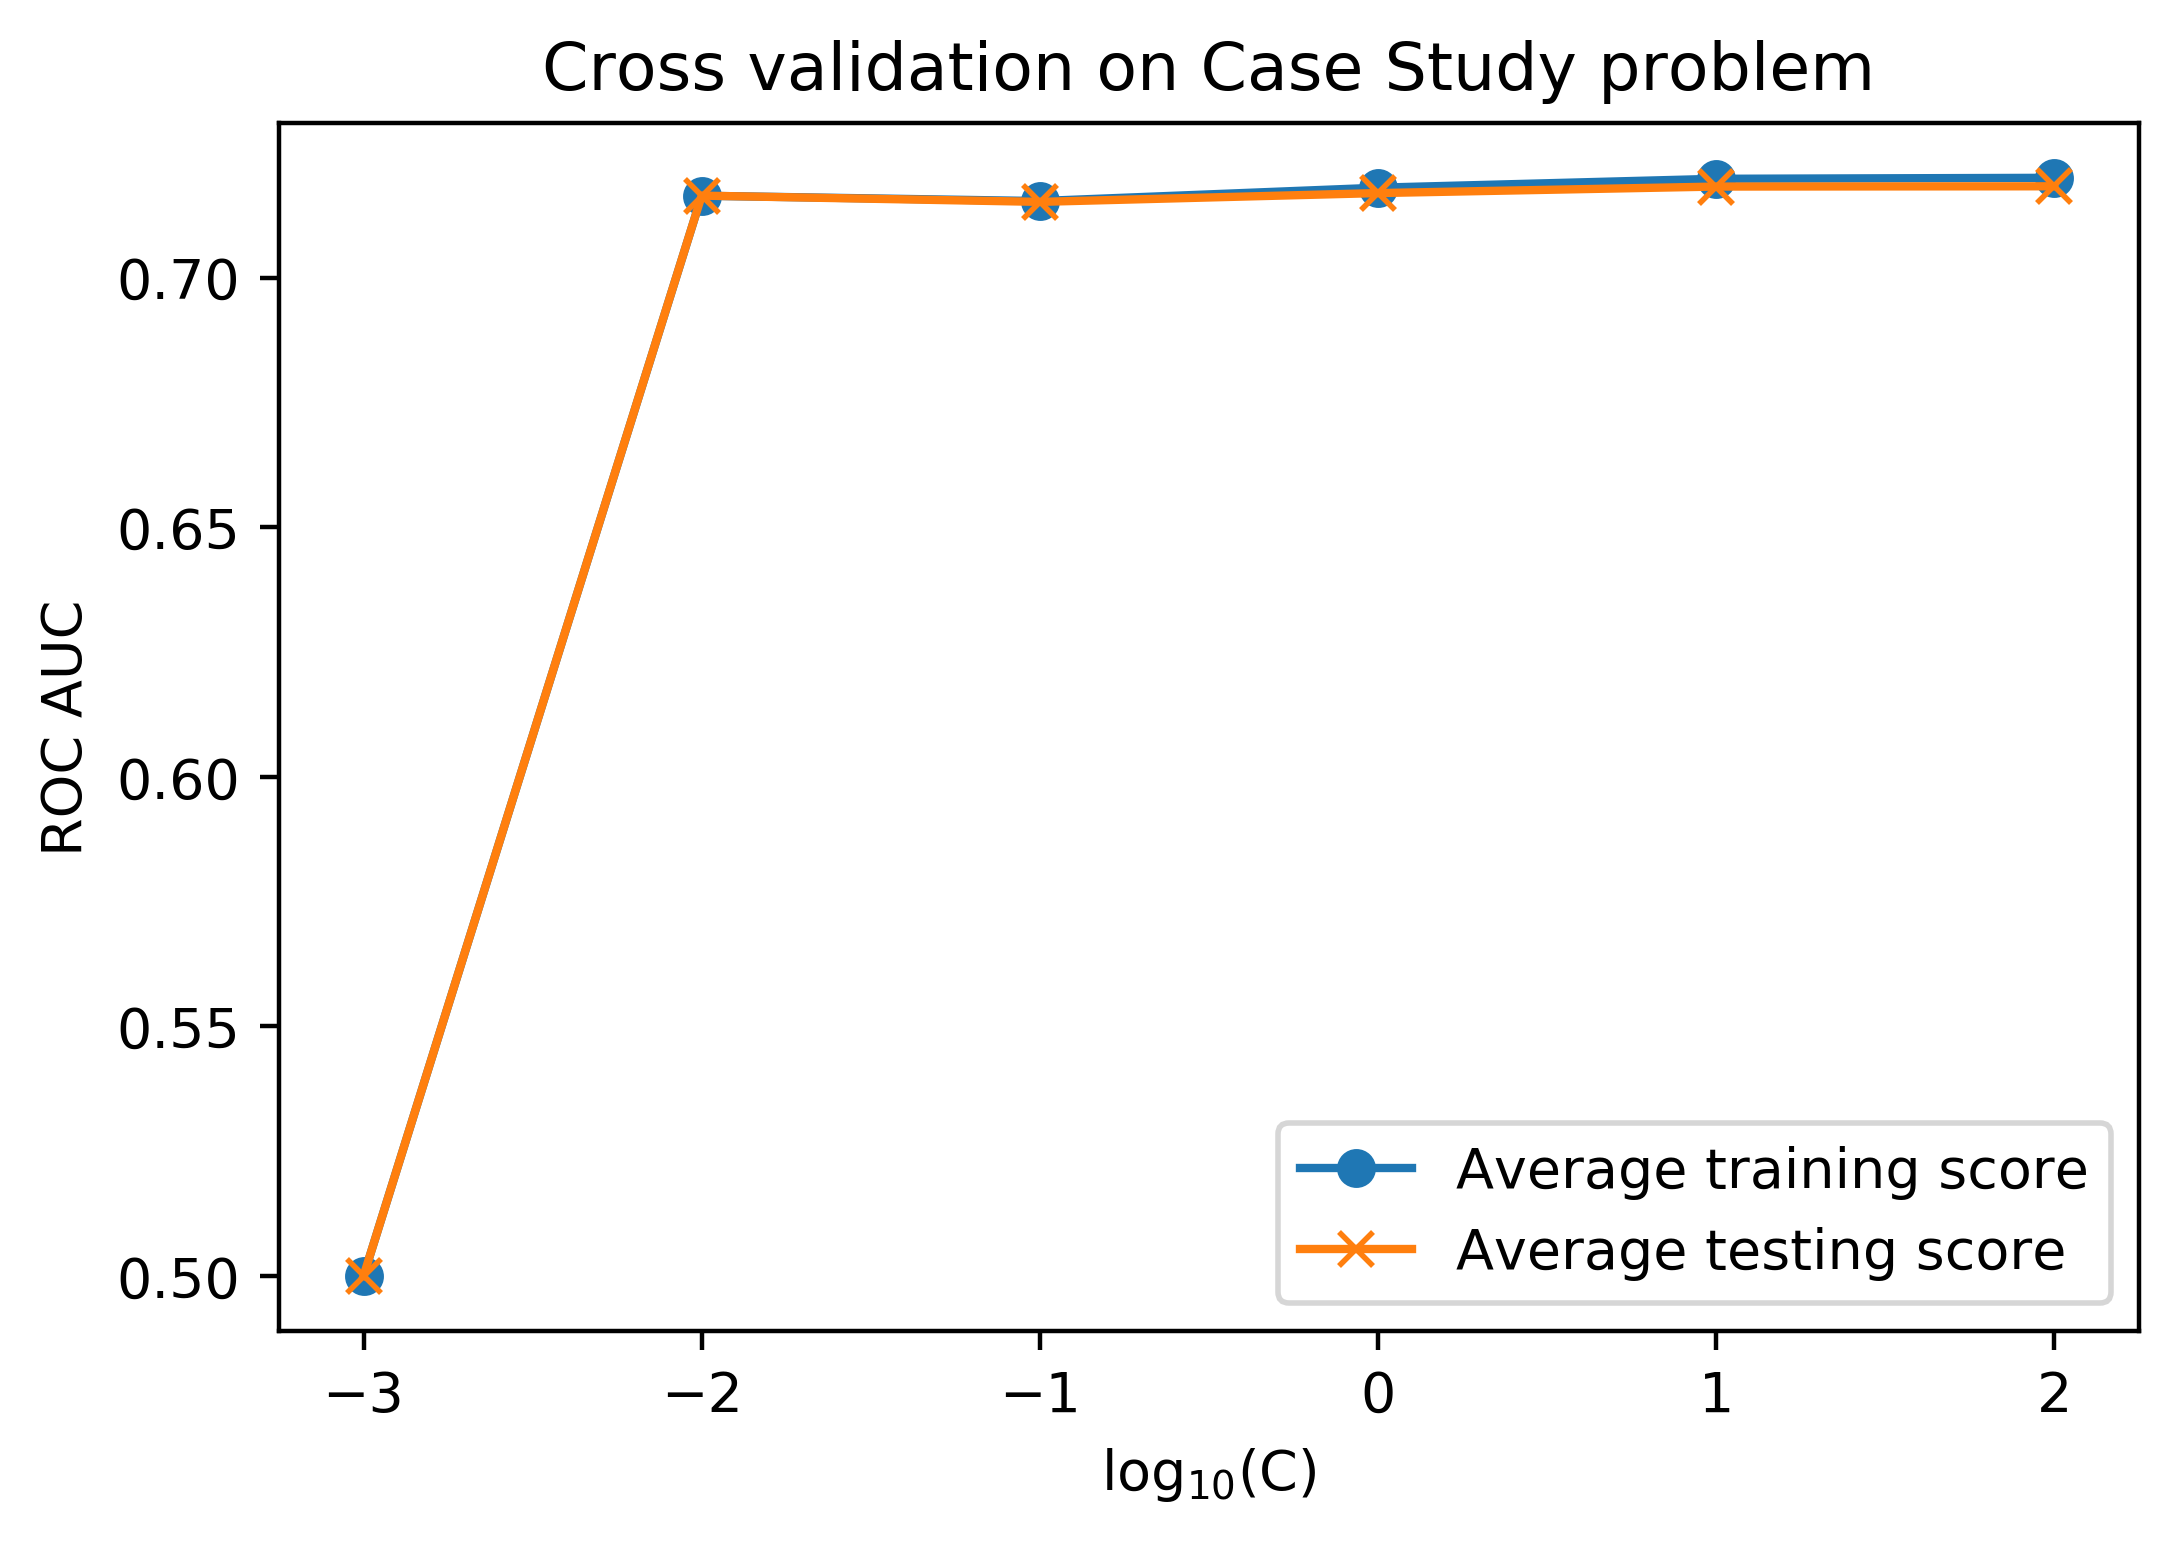

In [113]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

In [114]:
np.mean(cv_test_roc_auc, axis=0)
# array([0.7183383 , 0.71828489, 0.71698036, 0.71521589, 0.7164676 ,
#        0.5       ])

array([0.7183383 , 0.71828489, 0.71698036, 0.71521589, 0.7164676 ,
       0.5       ])

Doesn't look like overfitting is happening. Our model may be underfitting. Let's try to engineer some new features to see if we can improve performance.

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = make_interactions.fit_transform(X)

In [117]:
X_interact.shape

(26664, 153)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
X_interact, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [119]:
print(X_train.shape)
print(X_test.shape)

(21331, 153)
(5333, 153)


In [120]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 100.0


C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 10.0


C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\RMEHARW\AppData\Local\Continuum\anaconda2\envs\OPM_LT\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation on Case Study problem')

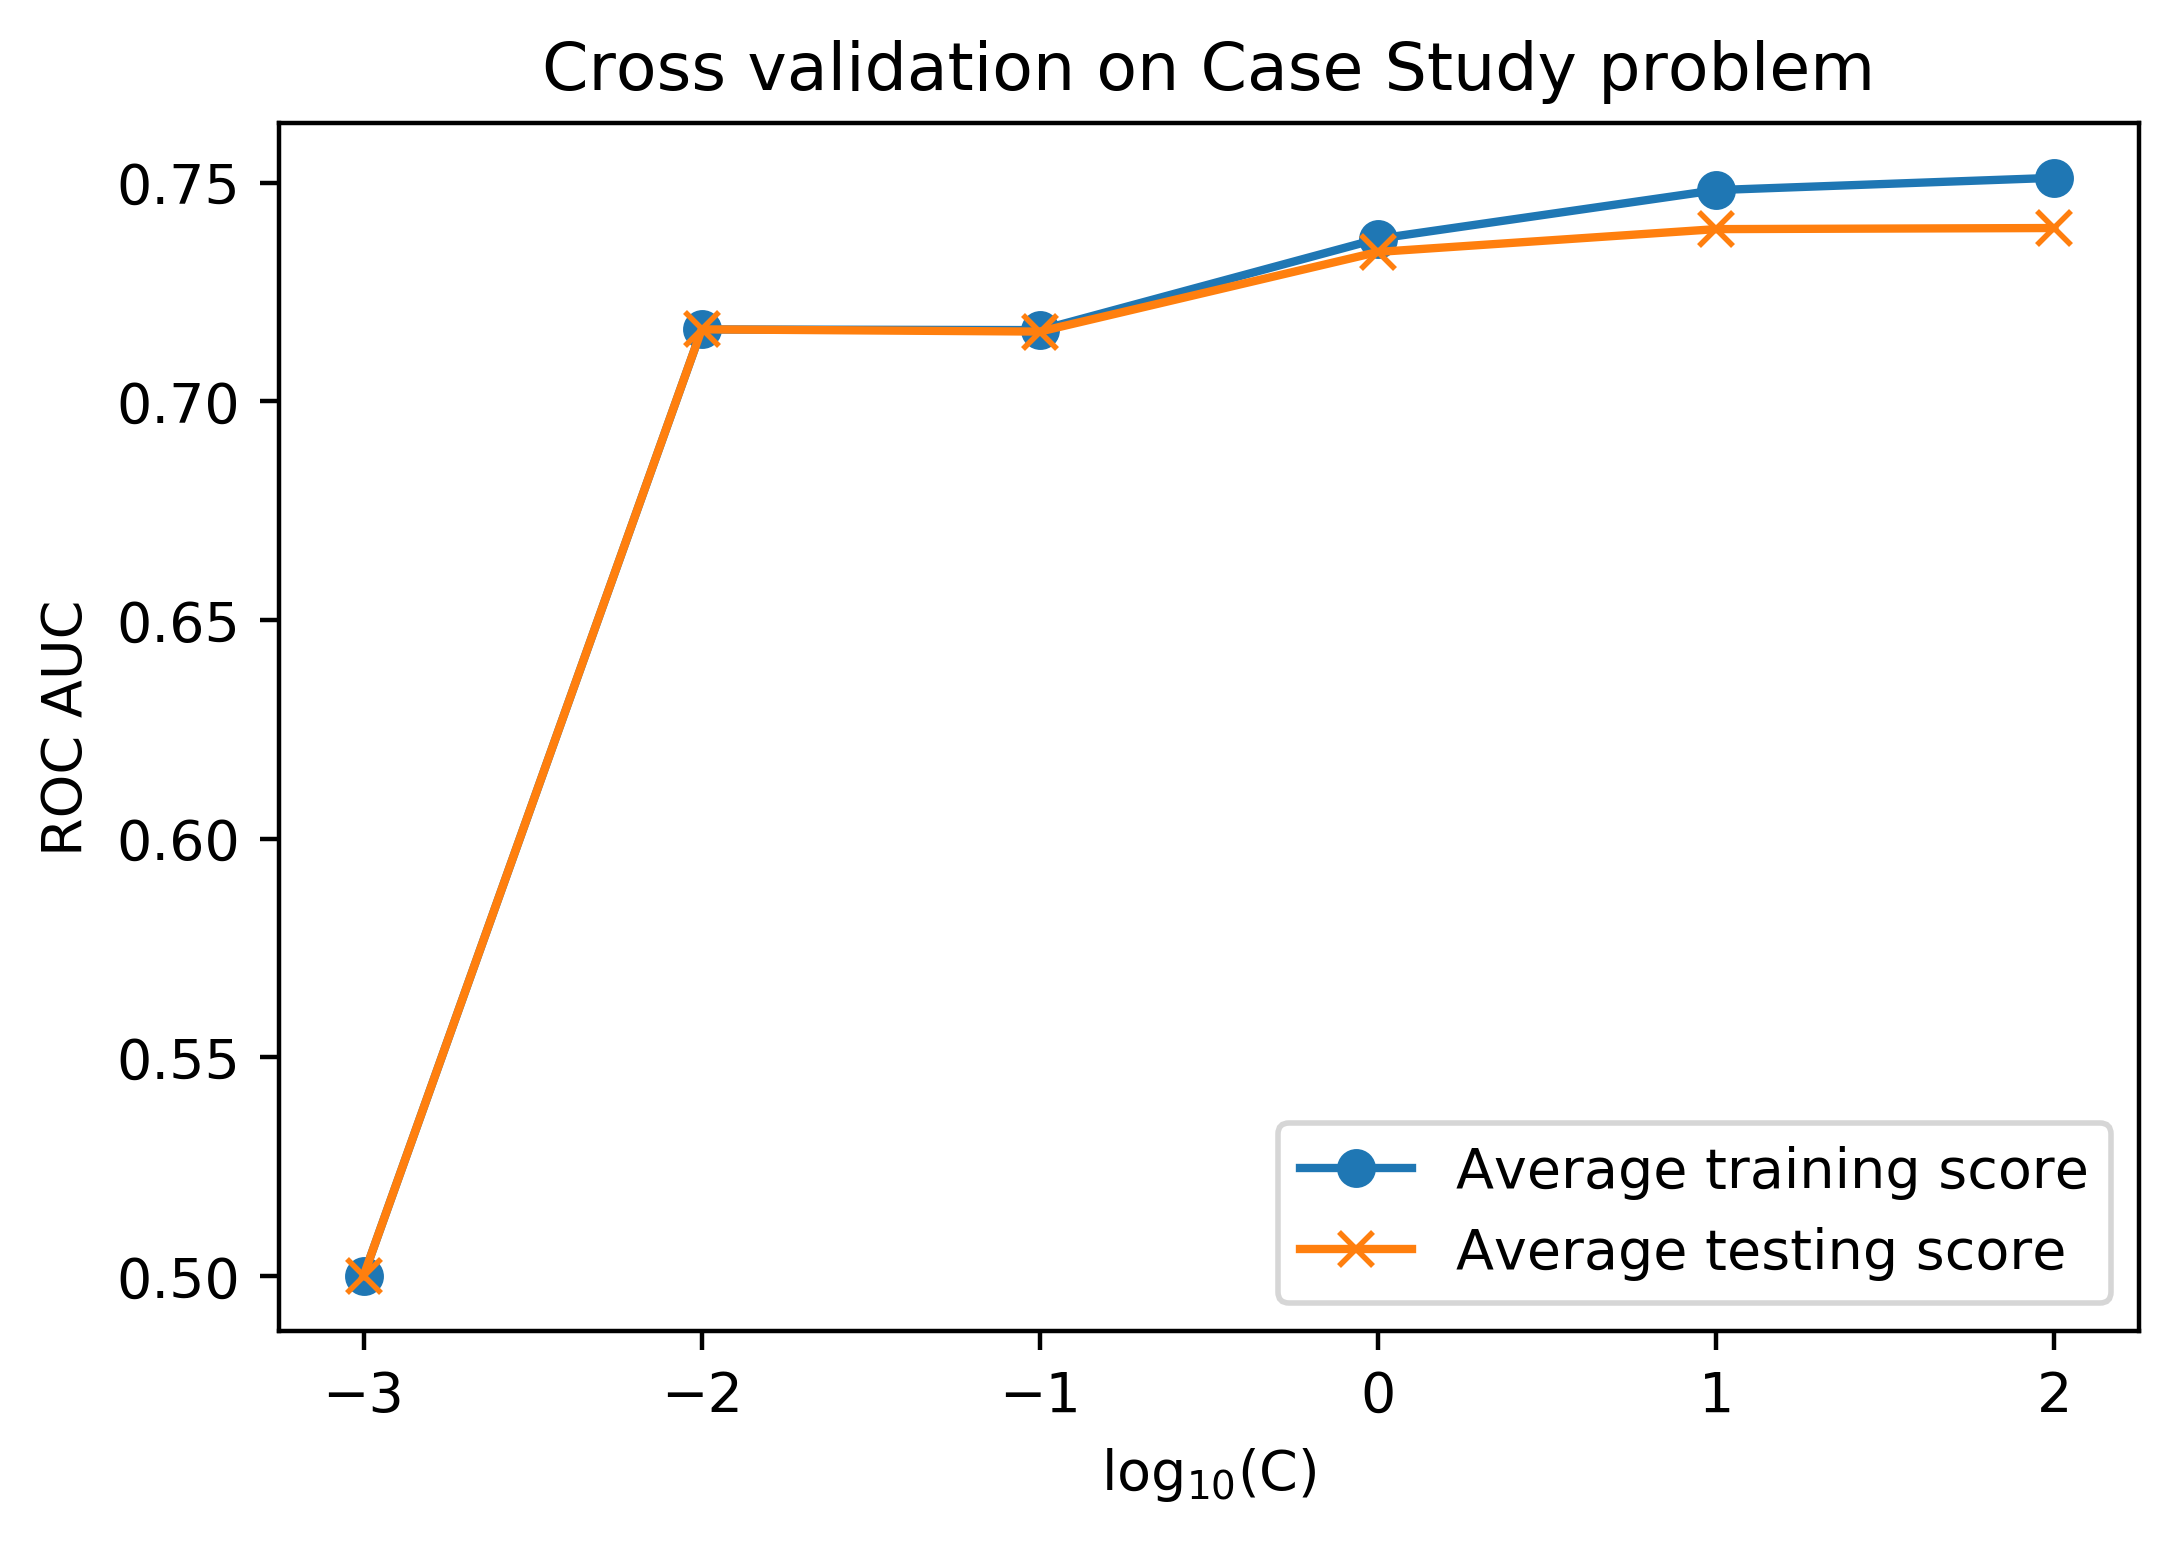

In [121]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

In [122]:
np.mean(cv_test_roc_auc, axis=0)
# array([0.73964018, 0.73938939, 0.73417501, 0.71595831, 0.7164676 ,
#        0.5       ])

array([0.73964018, 0.73938939, 0.73417501, 0.71595831, 0.7164676 ,
       0.5       ])